<a href="https://colab.research.google.com/github/sunitha-18577/Python-Fundamentals/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Cardiography.csv')

In [ ]:
df.dropna(inplace=True)
df.fillna(df.mean(),inplace=True)

In [ ]:
for col in df.columns:
  try:
    df[col]=pd.to_numeric(df[col])
  except ValueError:
    pass

In [ ]:
for col in df.select_dtypes(include='number').columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

In [ ]:
print(df.describe())
print(df.corr())

               LB          AC          FM          UC          DL     DS  \
count  904.000000  904.000000  904.000000  904.000000  904.000000  904.0   
mean   132.186337    0.003928    0.000581    0.004896    0.001520    0.0   
std      9.379489    0.003754    0.001296    0.002689    0.002255    0.0   
min    106.000000   -0.000122   -0.002076   -0.000101   -0.000124    0.0   
25%    125.000000    0.000000    0.000000    0.003103    0.000000    0.0   
50%    133.000000    0.003060    0.000000    0.004986    0.000000    0.0   
75%    139.000000    0.006595    0.000149    0.006839    0.002752    0.0   
max    160.000000    0.014068    0.006105    0.012072    0.008403    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  904.0  904.000000  904.000000  904.000000  904.000000  904.000000   
mean     0.0   42.851032    1.220650    4.375244    8.430429   65.712549   
std      0.0   15.145345    0.500114    8.289906    4.362057   31.358252   
min      0.

In [ ]:
import numpy as np


In [ ]:
data = df.to_dict('records')

In [ ]:
df=pd.DataFrame(data)


In [ ]:
def descriptive_statistics(df):
  results={}
  for col in df.columns:
    results[col]={}
    results[col]['mean']=df[col].mean()
    results[col]['median']=df[col].median()
    results[col]['std']=df[col].std()
    results[col]['q1']=df[col].quantile(0.25)
    results[col]['q3']=df[col].quantile(0.75)
    results[col]['iqr']=results[col]['q3']-results[col]['q1']
  return results


In [ ]:
  print('Descriptive Statistics:')
  print(descriptive_statistics(df))

Descriptive Statistics:
{'LB': {'mean': np.float64(132.18633678573008), 'median': 133.0, 'std': 9.379489264297316, 'q1': np.float64(125.0), 'q3': np.float64(139.0), 'iqr': np.float64(14.0)}, 'AC': {'mean': np.float64(0.003927953152654867), 'median': 0.0030604455, 'std': 0.003753958497577271, 'q1': np.float64(0.0), 'q3': np.float64(0.006595232), 'iqr': np.float64(0.006595232)}, 'FM': {'mean': np.float64(0.0005810692101769912), 'median': 0.0, 'std': 0.001295811109994268, 'q1': np.float64(0.0), 'q3': np.float64(0.00014895000000000002), 'iqr': np.float64(0.00014895000000000002)}, 'UC': {'mean': np.float64(0.004896066915929203), 'median': 0.004986288, 'std': 0.0026887126900627103, 'q1': np.float64(0.003103211), 'q3': np.float64(0.00683928225), 'iqr': np.float64(0.0037360712500000004)}, 'DL': {'mean': np.float64(0.0015200655829646019), 'median': 0.0, 'std': 0.002254970780684977, 'q1': np.float64(0.0), 'q3': np.float64(0.0027523007499999997), 'iqr': np.float64(0.0027523007499999997)}, 'DS': {

In [ ]:
def intresting_findings(df,stats):
  findings={}
  for col in df.columns:
    findings[col]=[]
    if stats[col]['std']>stats[col]['mean']/2:
      findings[col].append(f"High variablity:Standard deviation is relatively high ({stats[col]['std']}) compared to the mean for({col}")
    if abs(stats[col]['mean']-stats[col]['median'])>stats[col]['std'] /2:
      findings[col].append(f"potential skewness :mean and median are significantly different for{col}.")
    if stats[col]['iqr']==0:
      findings[col].append(f"No outliers detected for{col}.")
  return findings


In [ ]:
stats = descriptive_statistics(df)
findings = intresting_findings(df, stats)

In [ ]:
print("Descriptive Statistics:")
for col, stat in stats.items():
    print(f"Column:{col}")
    for key, value in stat.items():
        print(f"  {key}: {value:.2f}")
    print()

Descriptive Statistics:
Column:LB
  mean: 132.19
  median: 133.00
  std: 9.38
  q1: 125.00
  q3: 139.00
  iqr: 14.00

Column:AC
  mean: 0.00
  median: 0.00
  std: 0.00
  q1: 0.00
  q3: 0.01
  iqr: 0.01

Column:FM
  mean: 0.00
  median: 0.00
  std: 0.00
  q1: 0.00
  q3: 0.00
  iqr: 0.00

Column:UC
  mean: 0.00
  median: 0.00
  std: 0.00
  q1: 0.00
  q3: 0.01
  iqr: 0.00

Column:DL
  mean: 0.00
  median: 0.00
  std: 0.00
  q1: 0.00
  q3: 0.00
  iqr: 0.00

Column:DS
  mean: 0.00
  median: 0.00
  std: 0.00
  q1: 0.00
  q3: 0.00
  iqr: 0.00

Column:DP
  mean: 0.00
  median: 0.00
  std: 0.00
  q1: 0.00
  q3: 0.00
  iqr: 0.00

Column:ASTV
  mean: 42.85
  median: 42.00
  std: 15.15
  q1: 29.00
  q3: 56.00
  iqr: 27.00

Column:MSTV
  mean: 1.22
  median: 1.20
  std: 0.50
  q1: 0.80
  q3: 1.50
  iqr: 0.70

Column:ALTV
  mean: 4.38
  median: 0.00
  std: 8.29
  q1: 0.00
  q3: 5.00
  iqr: 5.00

Column:MLTV
  mean: 8.43
  median: 8.20
  std: 4.36
  q1: 5.60
  q3: 11.10
  iqr: 5.50

Column:Width
  me

In [ ]:
print("Intresting Findings:")
for col, find in findings.items():
    print(f"Column:{col}")
    for finding in findings:
        print(f"  {finding}")
    print()

Intresting Findings:
Column:LB
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
  Tendency
  NSP

Column:AC
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
  Tendency
  NSP

Column:FM
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
  Tendency
  NSP

Column:UC
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
  Tendency
  NSP

Column:DL
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
  Tendency
  NSP

Column:DS
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
  Tendency
  NSP

Column:DP
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
  Tendency
  NSP

Column:ASTV
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
  Tendency
  NSP

Column:MSTV
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
  Tendency
  NSP

Column:ALTV
  LB
  AC
  FM
  UC
  DL
  DS
  DP
  ASTV
  MSTV
  ALTV
  MLTV
  Width
 

In [ ]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of{col}')
plt.show()

<ipython-input-26-4ecc2e1a2121>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


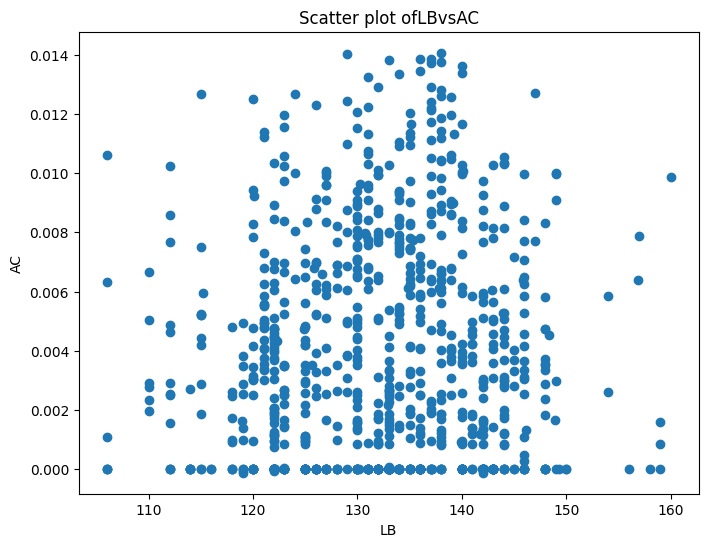

<Figure size 640x480 with 0 Axes>

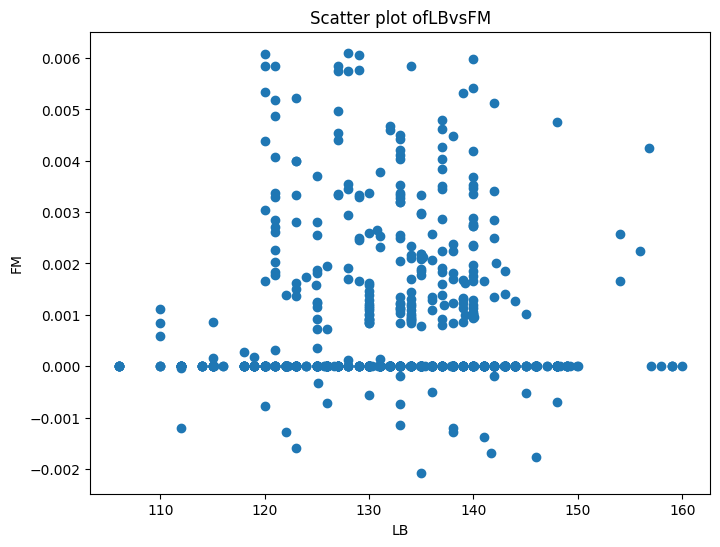

<Figure size 640x480 with 0 Axes>

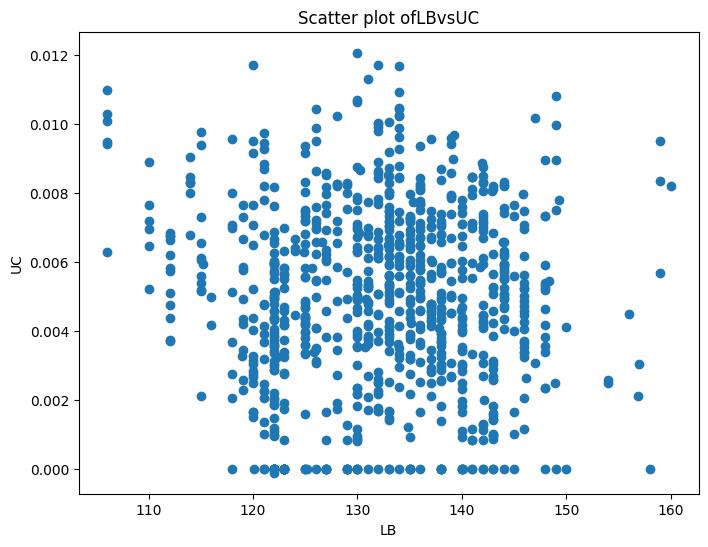

<Figure size 640x480 with 0 Axes>

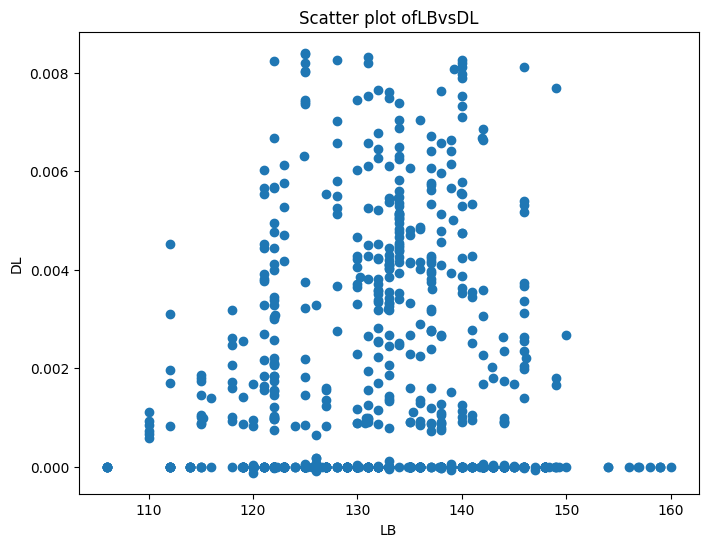

<Figure size 640x480 with 0 Axes>

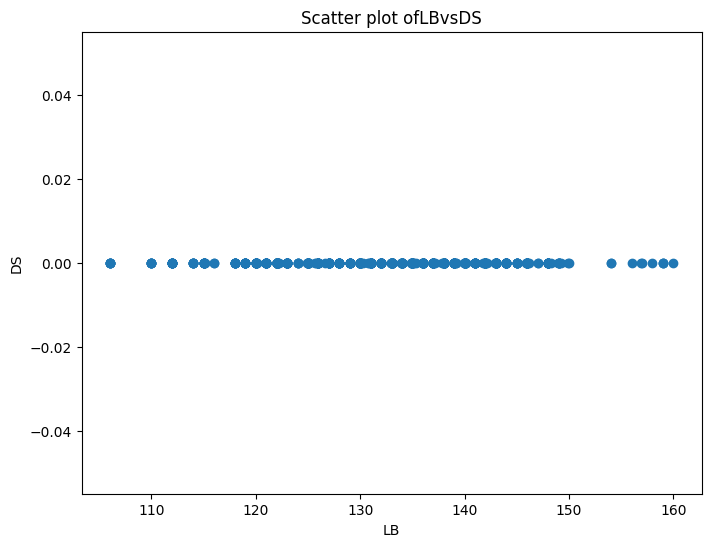

<Figure size 640x480 with 0 Axes>

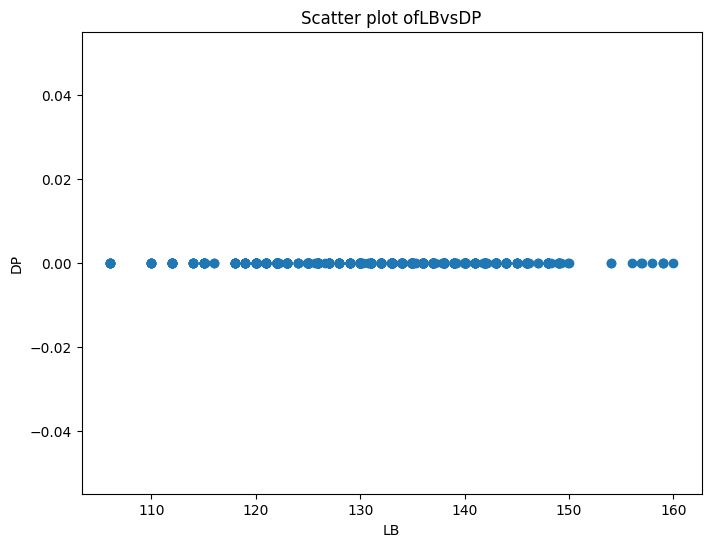

<Figure size 640x480 with 0 Axes>

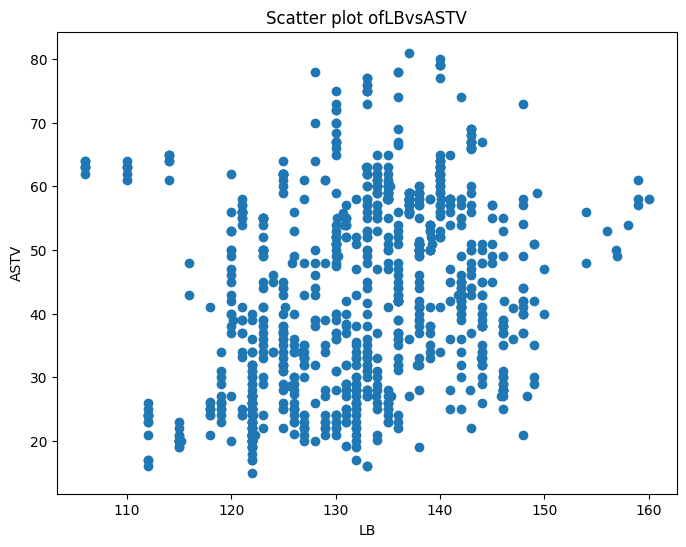

<Figure size 640x480 with 0 Axes>

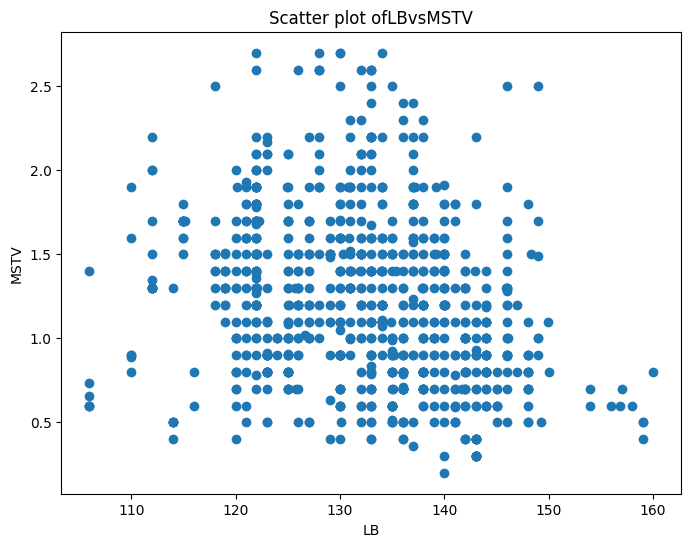

<Figure size 640x480 with 0 Axes>

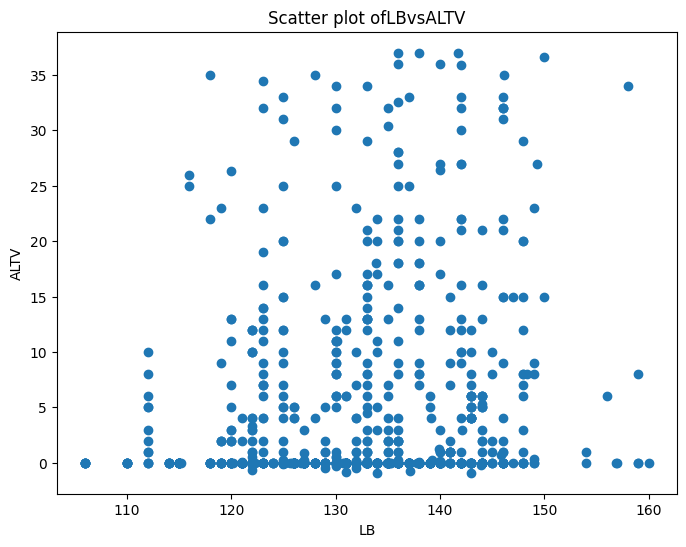

<Figure size 640x480 with 0 Axes>

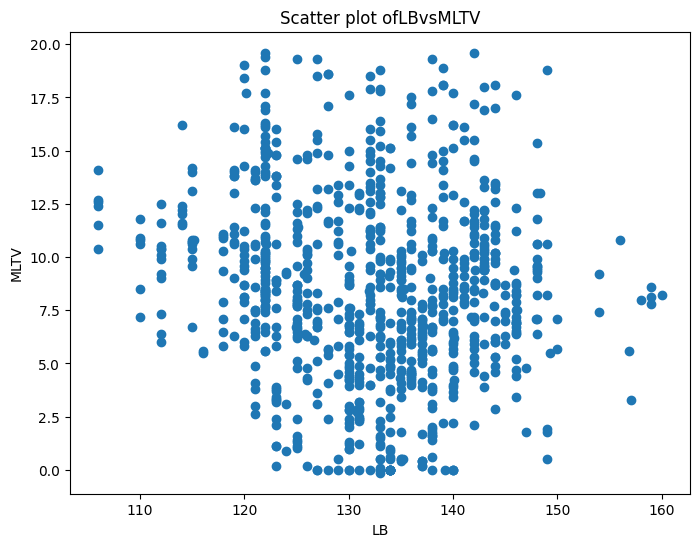

<Figure size 640x480 with 0 Axes>

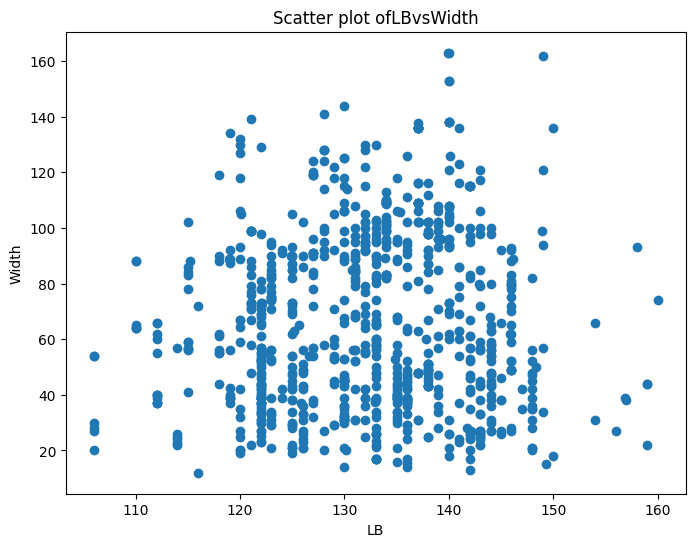

<Figure size 640x480 with 0 Axes>

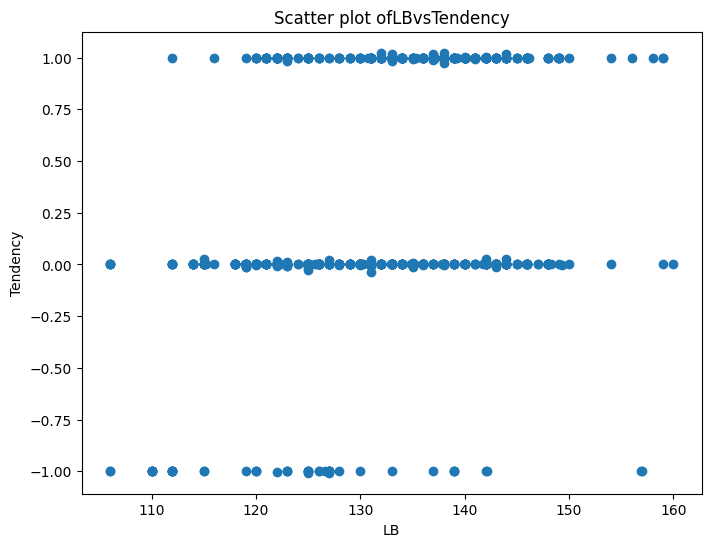

<Figure size 640x480 with 0 Axes>

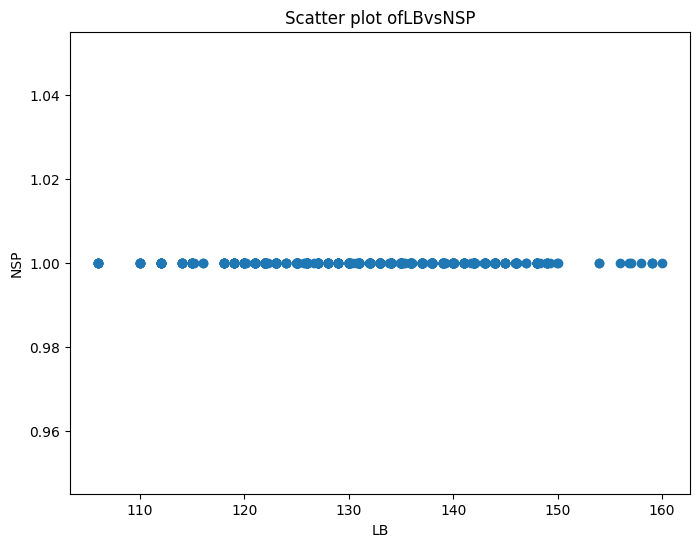

<Figure size 640x480 with 0 Axes>

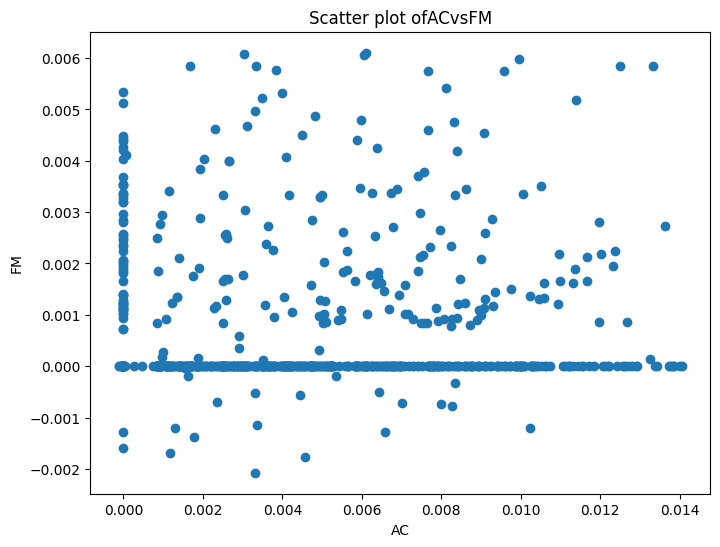

<Figure size 640x480 with 0 Axes>

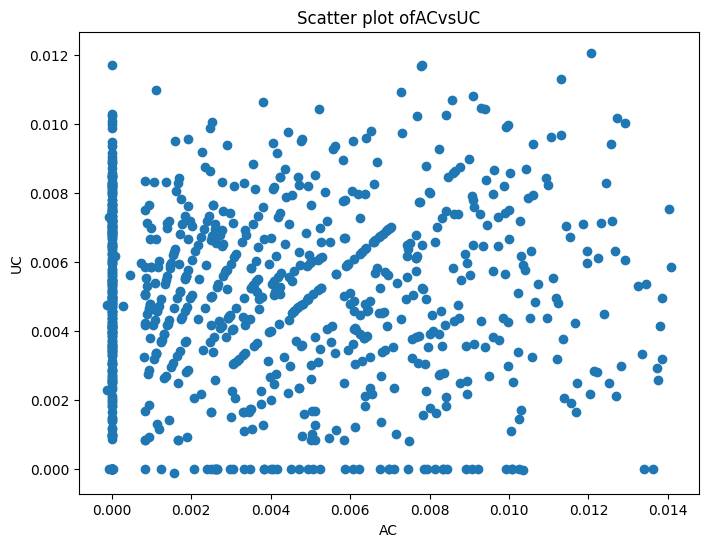

<Figure size 640x480 with 0 Axes>

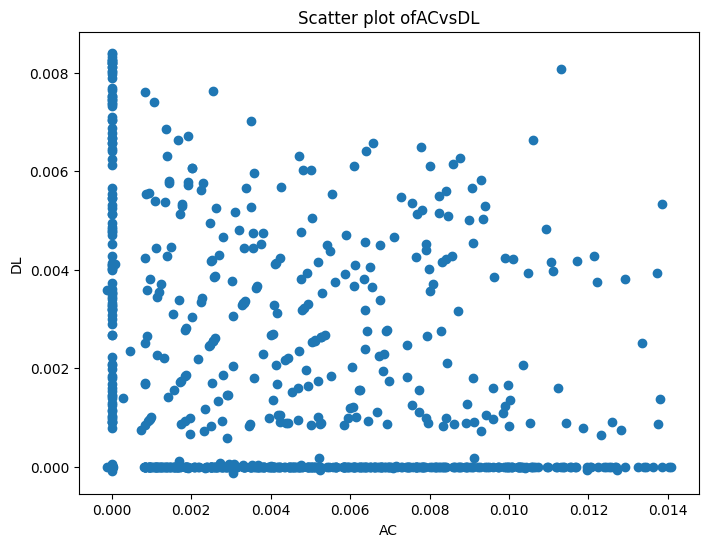

<Figure size 640x480 with 0 Axes>

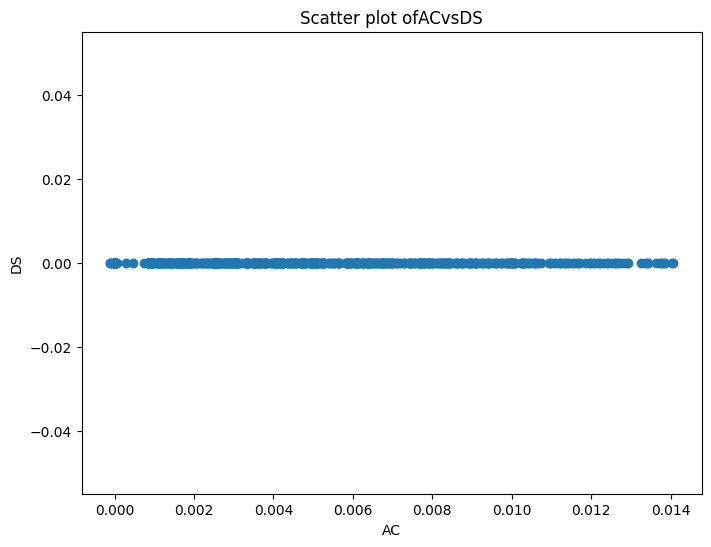

<Figure size 640x480 with 0 Axes>

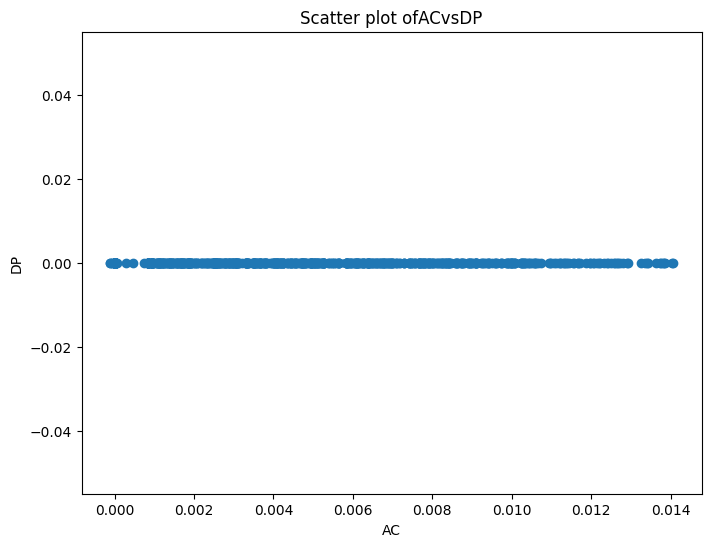

<Figure size 640x480 with 0 Axes>

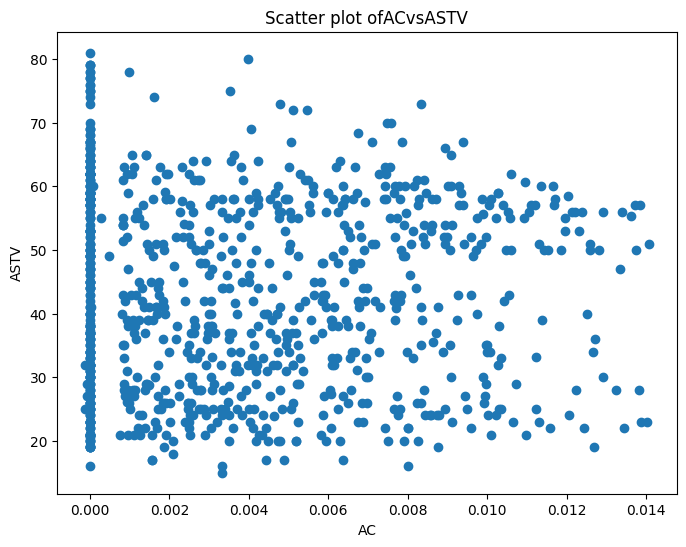

<Figure size 640x480 with 0 Axes>

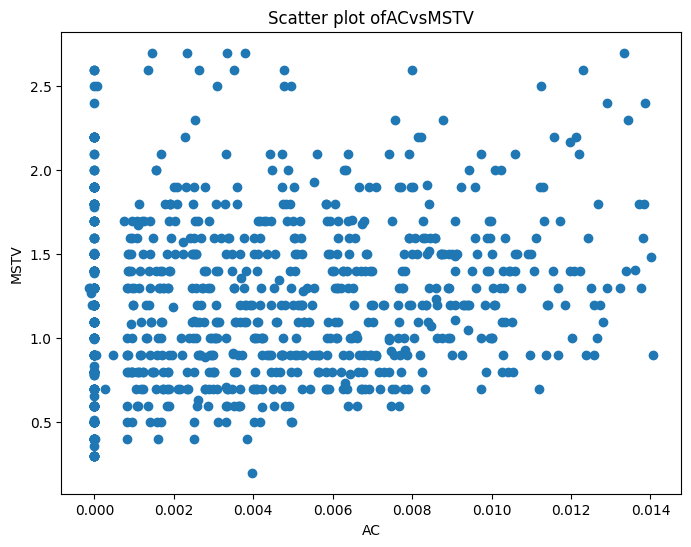

<Figure size 640x480 with 0 Axes>

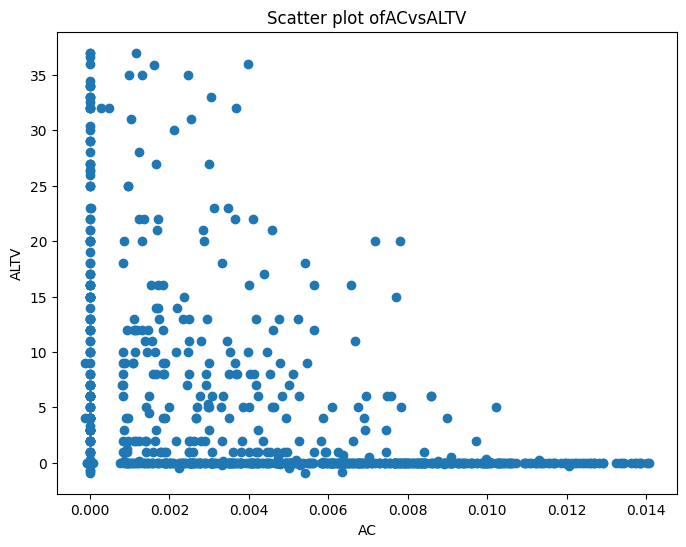

<Figure size 640x480 with 0 Axes>

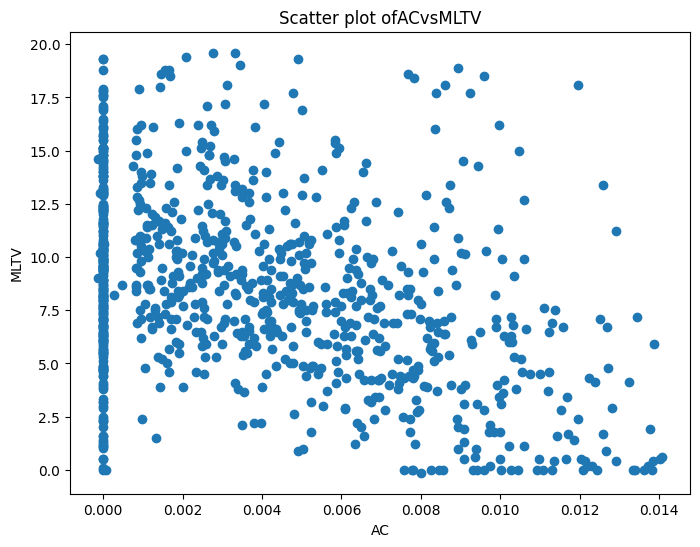

<Figure size 640x480 with 0 Axes>

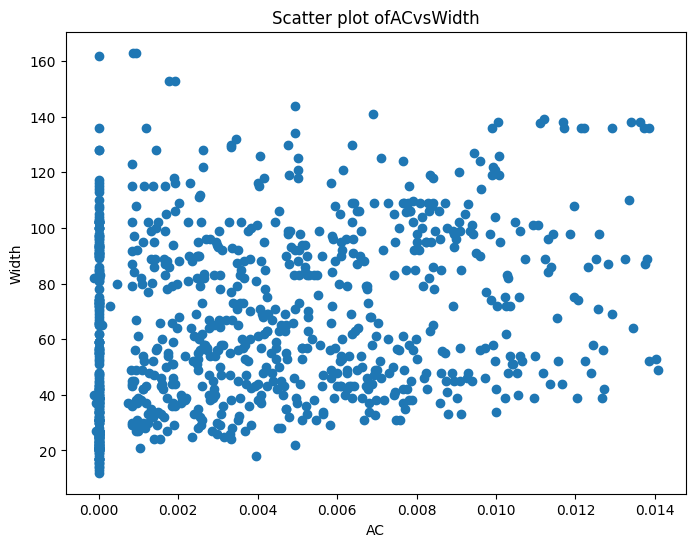

<Figure size 640x480 with 0 Axes>

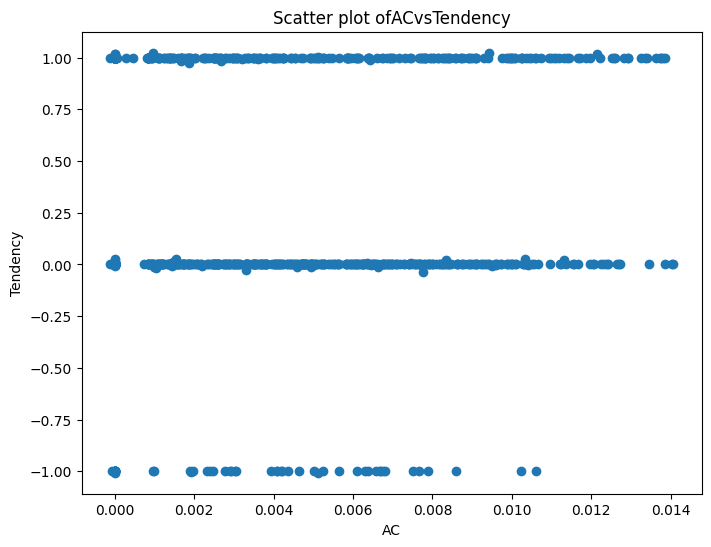

<Figure size 640x480 with 0 Axes>

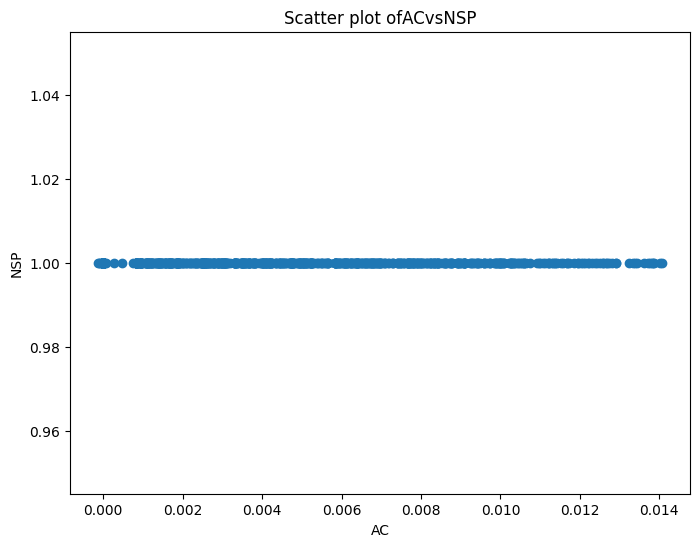

<Figure size 640x480 with 0 Axes>

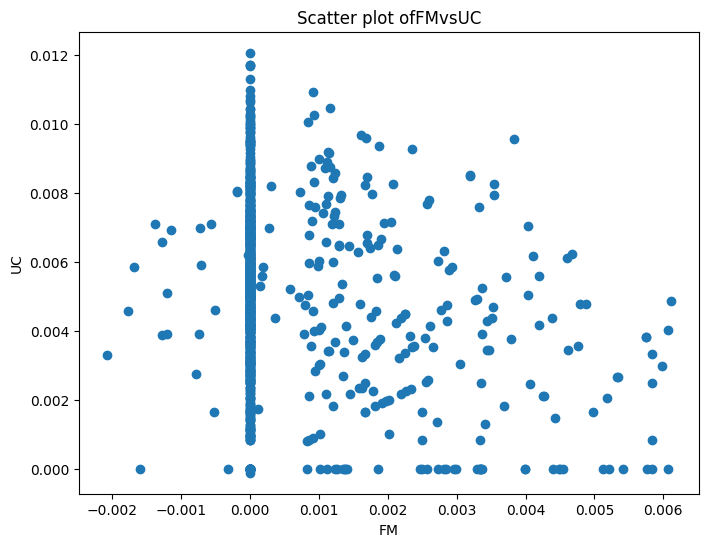

<Figure size 640x480 with 0 Axes>

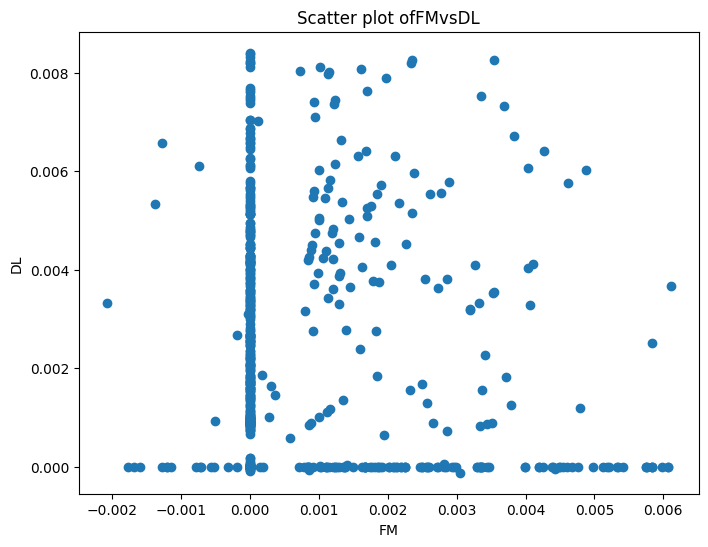

<Figure size 640x480 with 0 Axes>

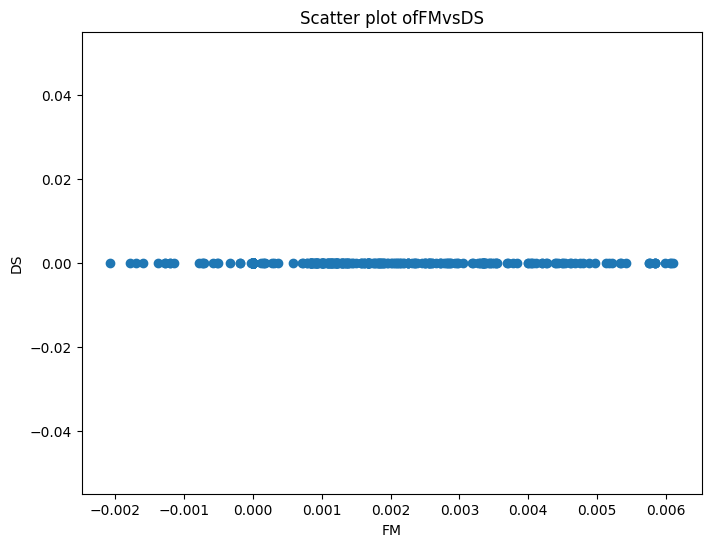

<Figure size 640x480 with 0 Axes>

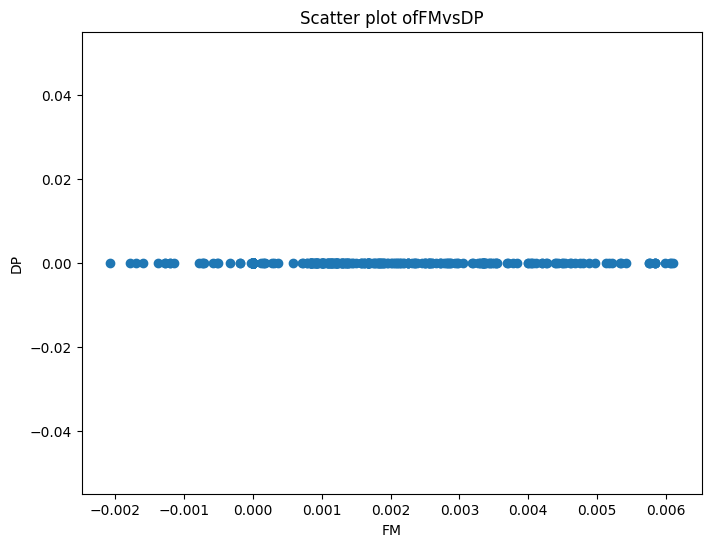

<Figure size 640x480 with 0 Axes>

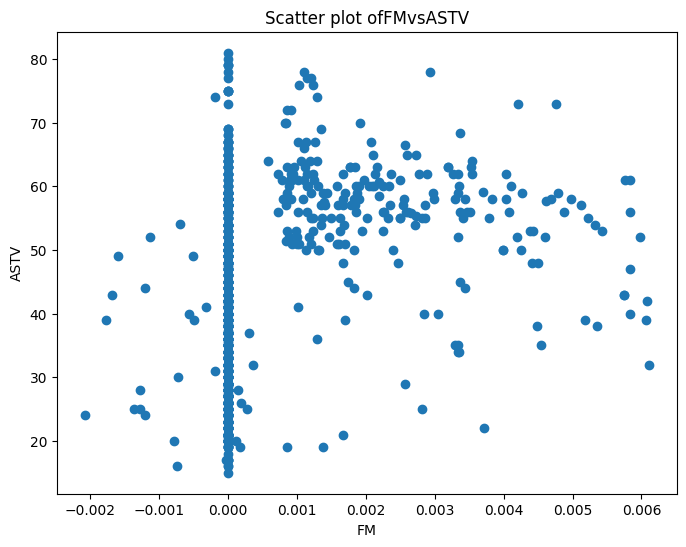

<Figure size 640x480 with 0 Axes>

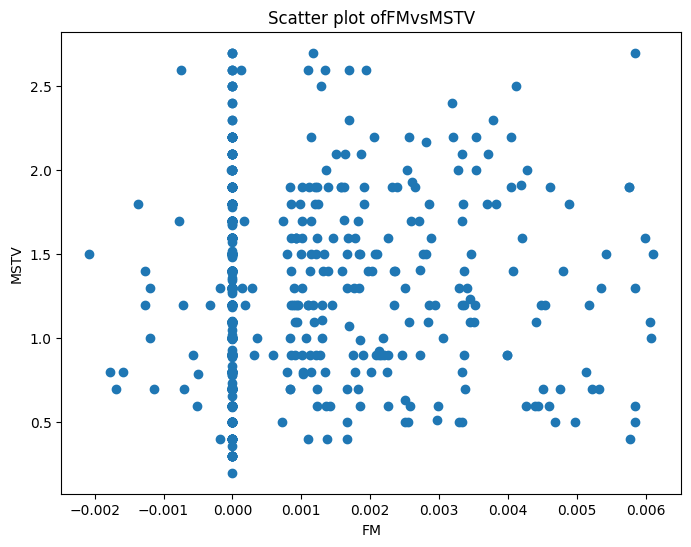

<Figure size 640x480 with 0 Axes>

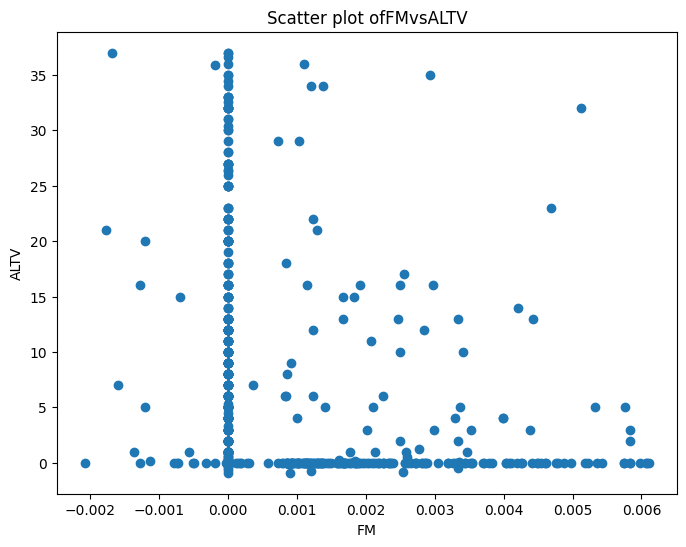

<Figure size 640x480 with 0 Axes>

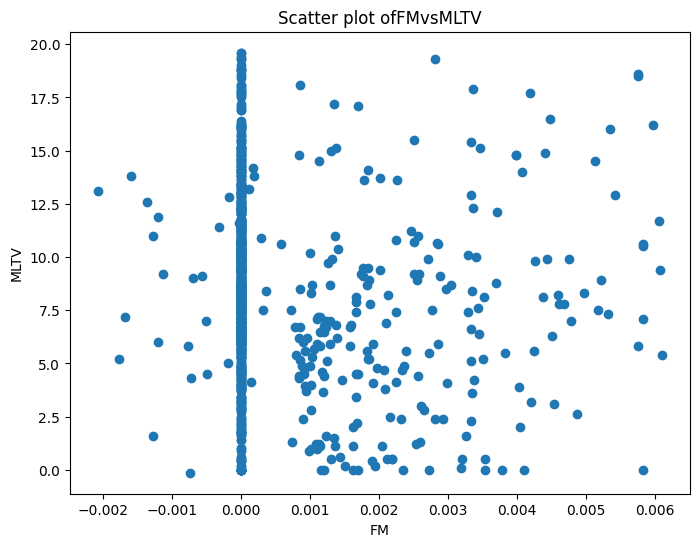

<Figure size 640x480 with 0 Axes>

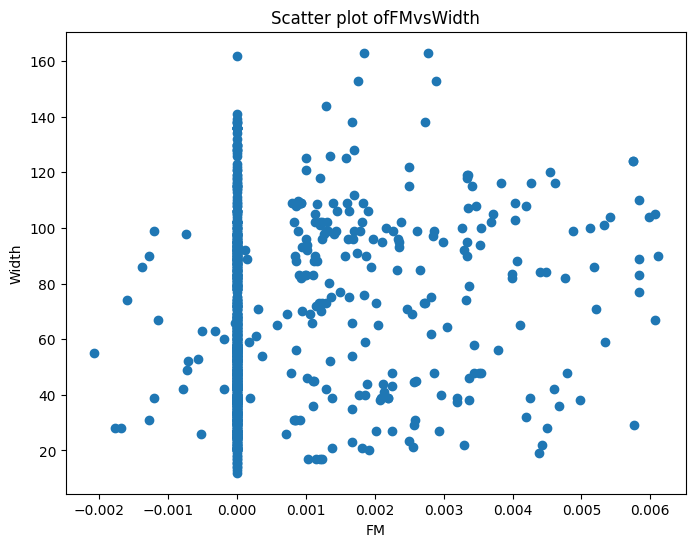

<Figure size 640x480 with 0 Axes>

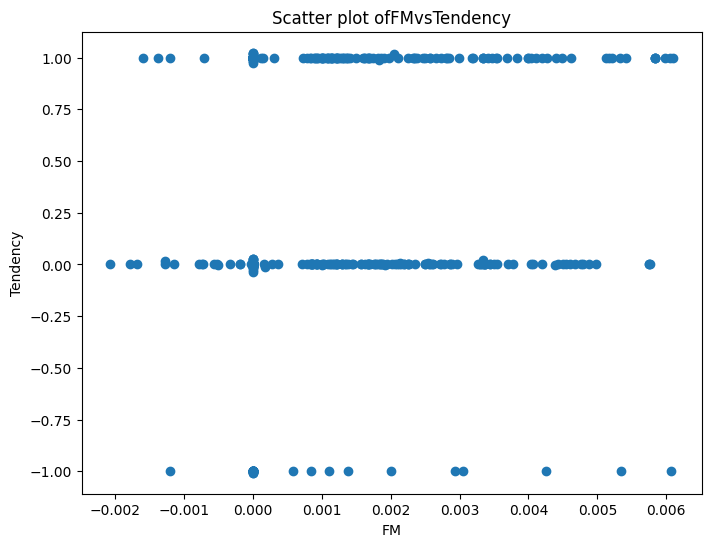

<Figure size 640x480 with 0 Axes>

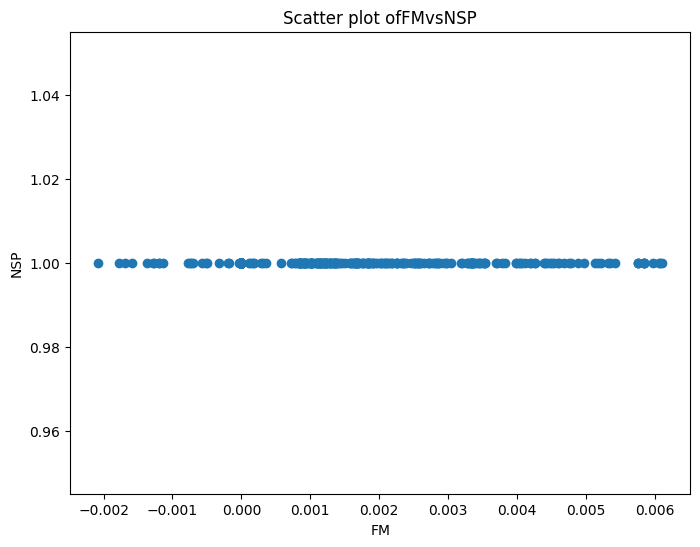

<Figure size 640x480 with 0 Axes>

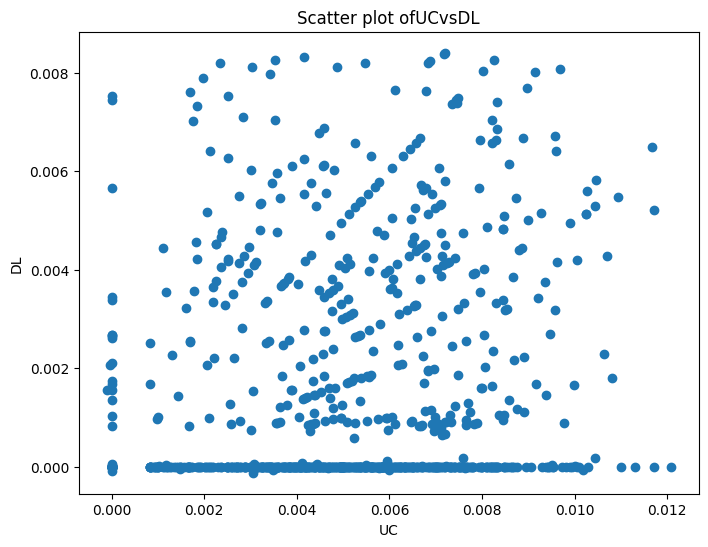

<Figure size 640x480 with 0 Axes>

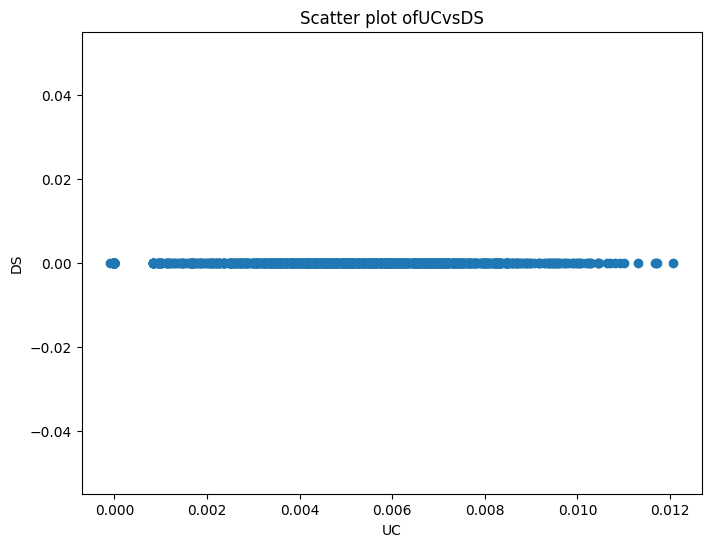

<Figure size 640x480 with 0 Axes>

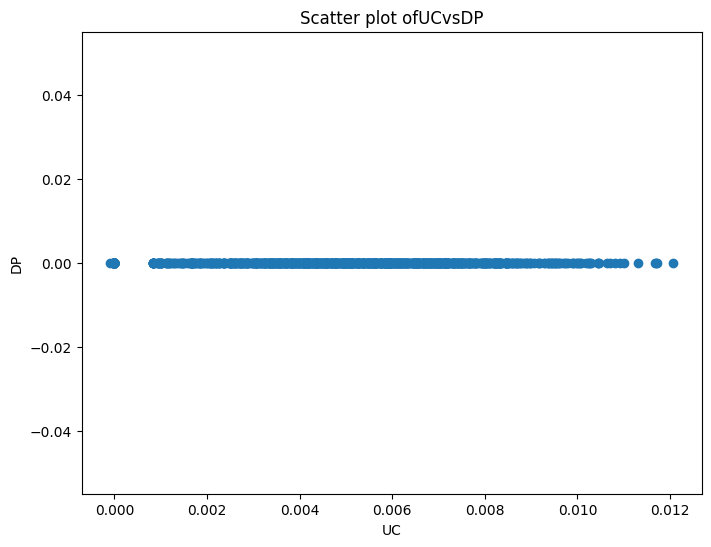

<Figure size 640x480 with 0 Axes>

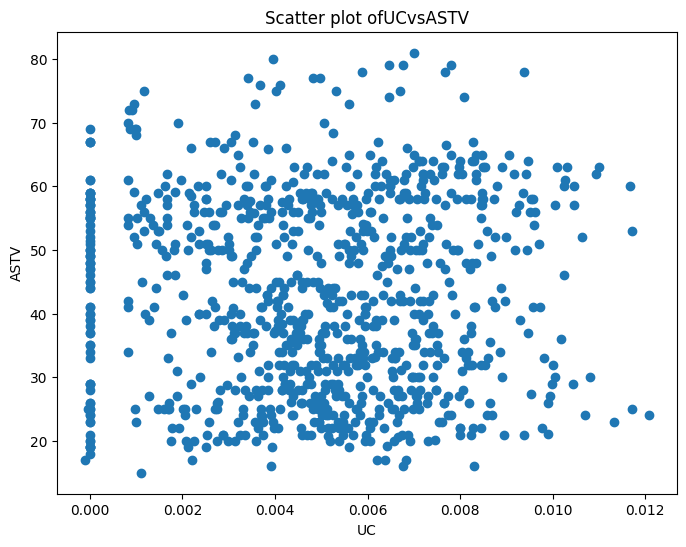

<Figure size 640x480 with 0 Axes>

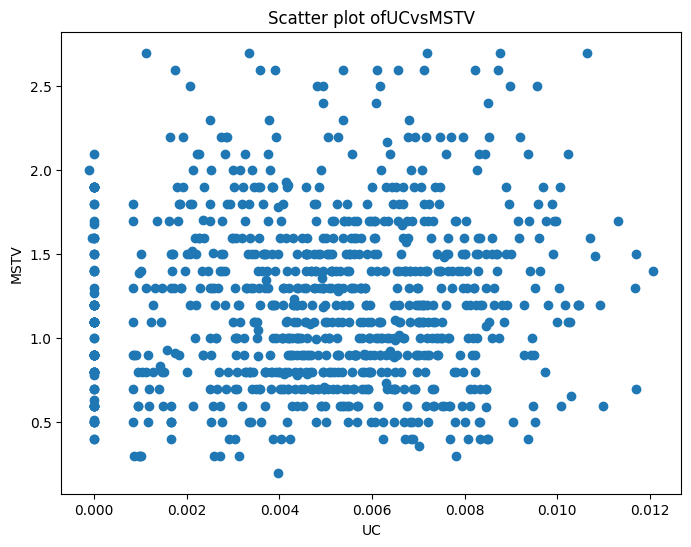

<Figure size 640x480 with 0 Axes>

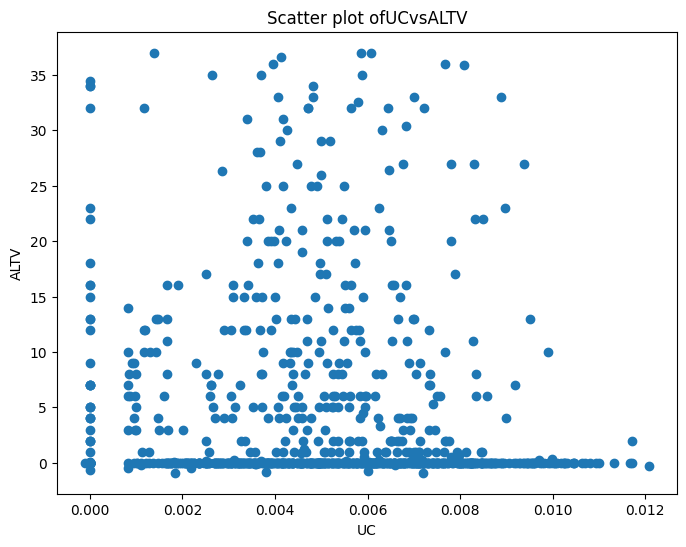

<Figure size 640x480 with 0 Axes>

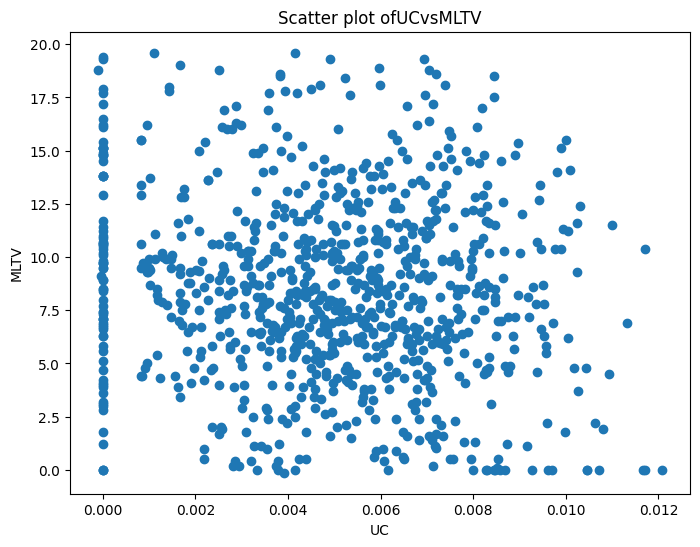

<Figure size 640x480 with 0 Axes>

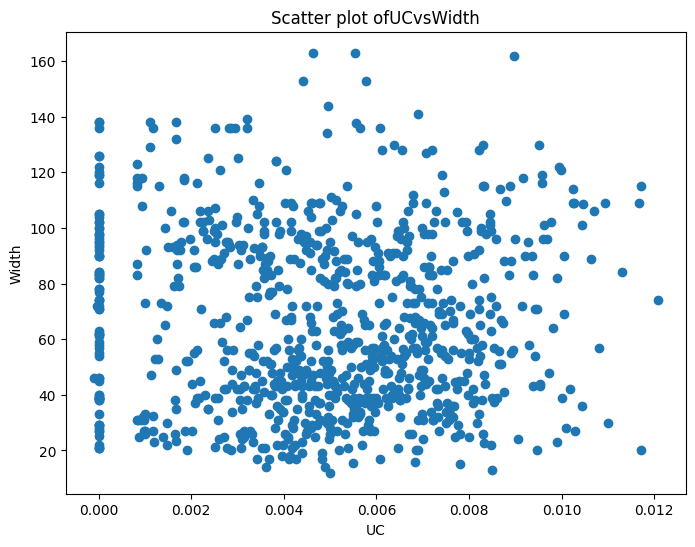

<Figure size 640x480 with 0 Axes>

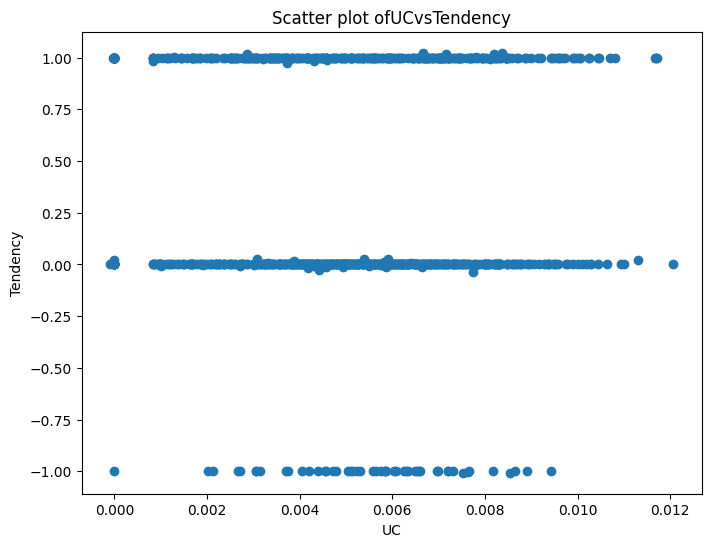

<Figure size 640x480 with 0 Axes>

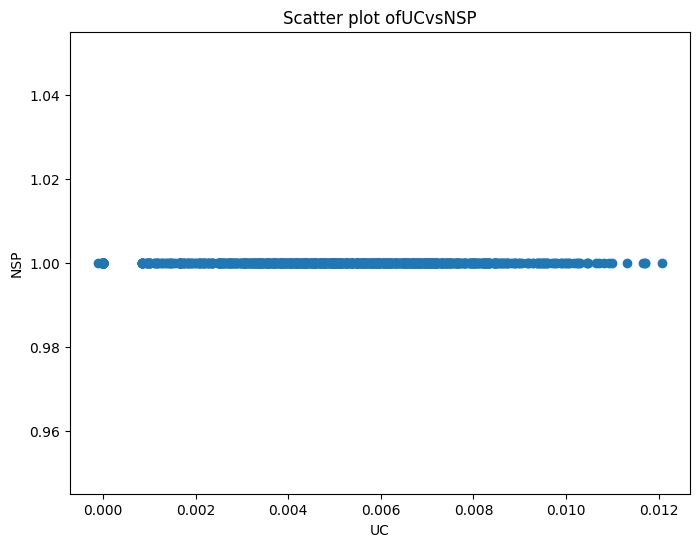

<Figure size 640x480 with 0 Axes>

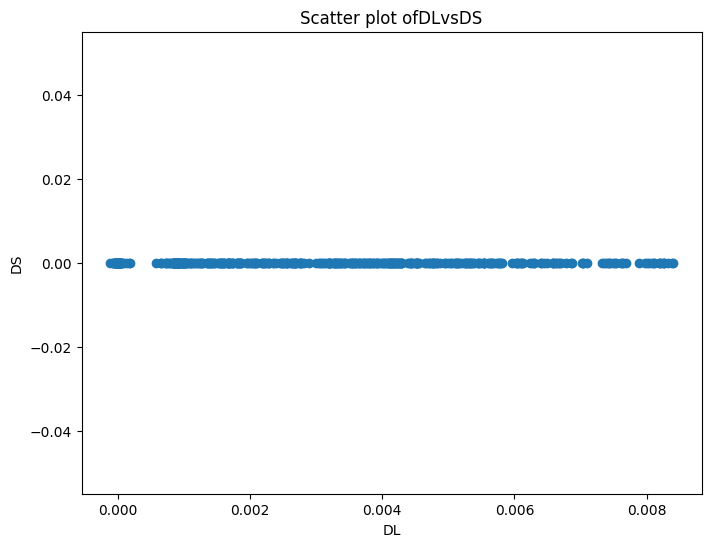

<Figure size 640x480 with 0 Axes>

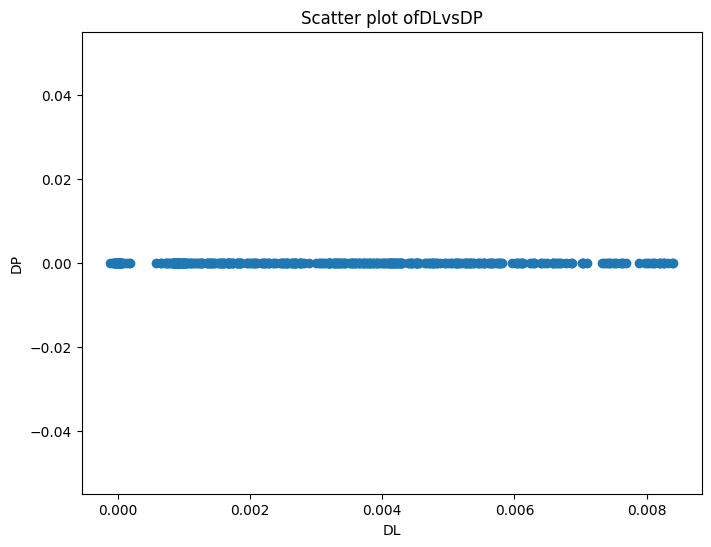

<Figure size 640x480 with 0 Axes>

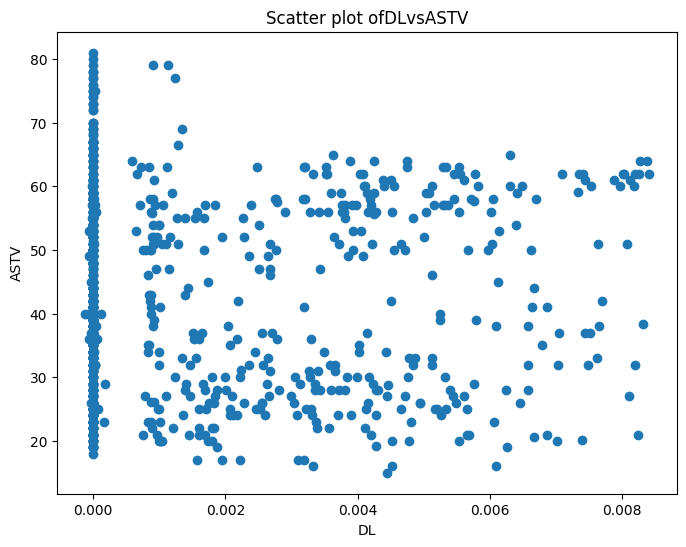

<Figure size 640x480 with 0 Axes>

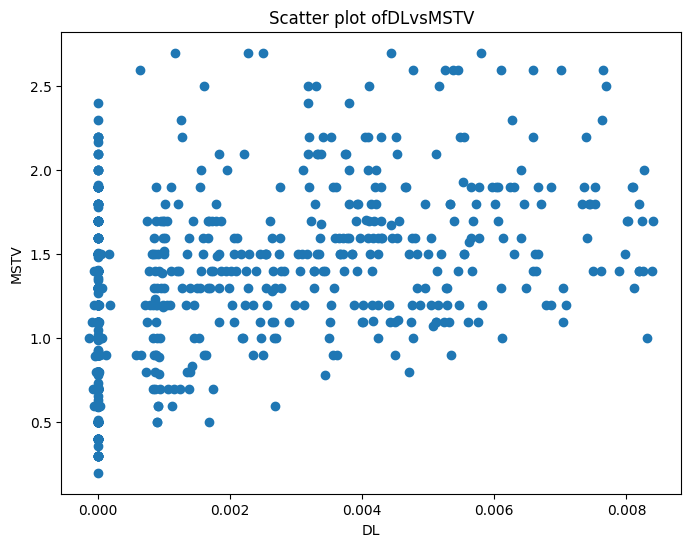

<Figure size 640x480 with 0 Axes>

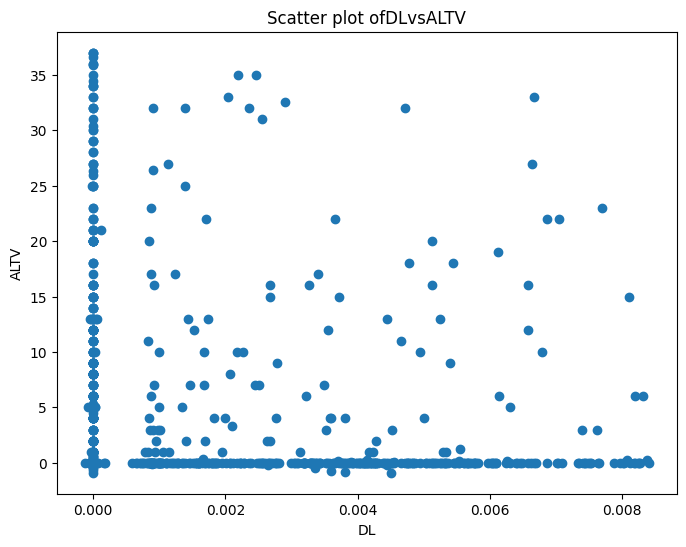

<Figure size 640x480 with 0 Axes>

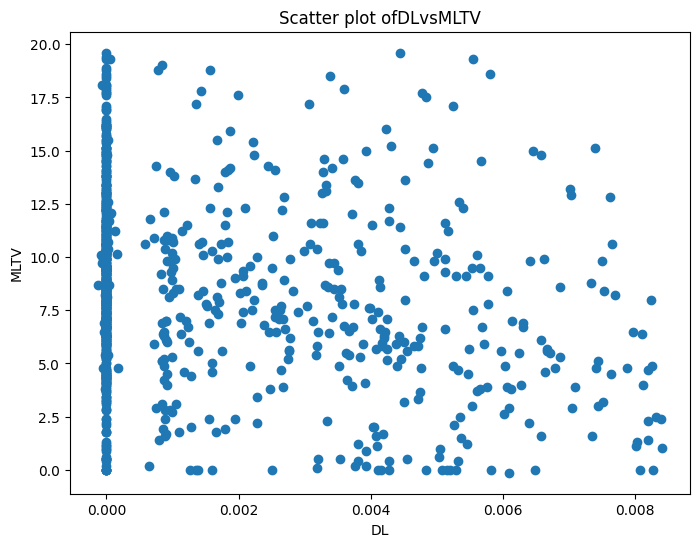

<Figure size 640x480 with 0 Axes>

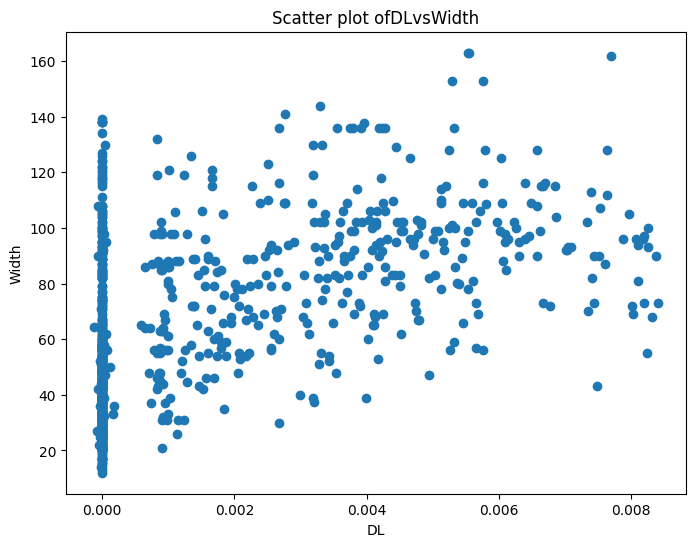

<Figure size 640x480 with 0 Axes>

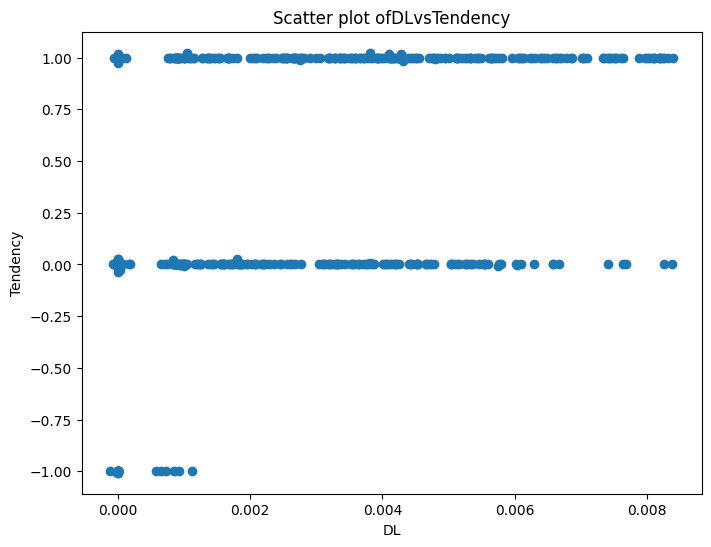

<Figure size 640x480 with 0 Axes>

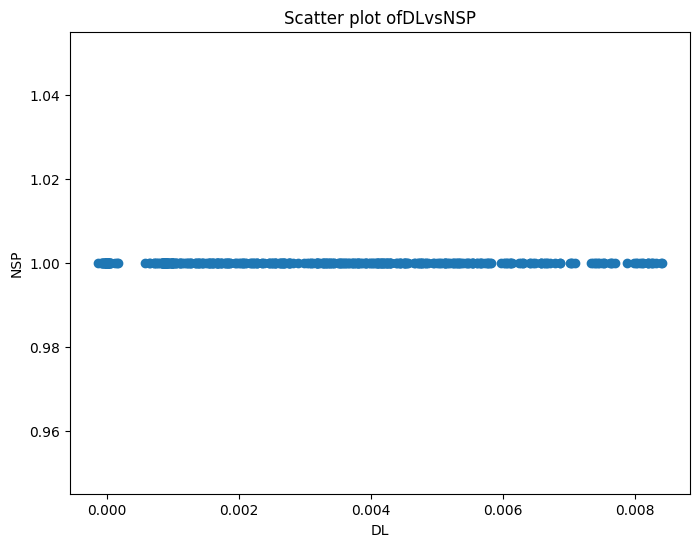

<Figure size 640x480 with 0 Axes>

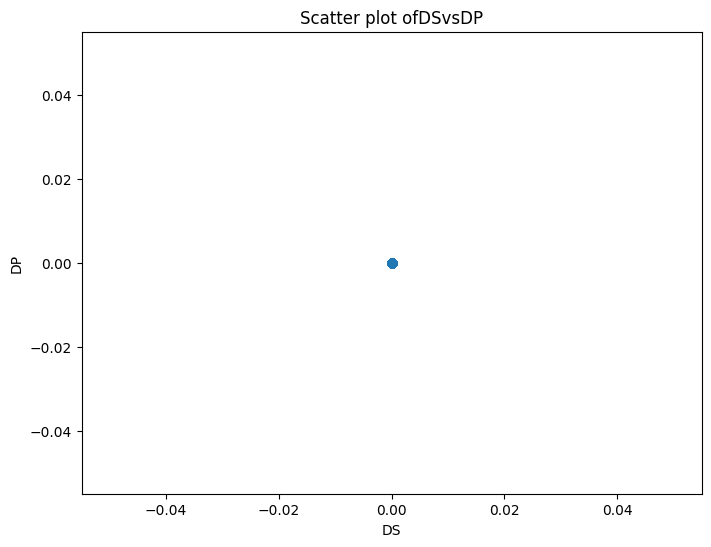

<Figure size 640x480 with 0 Axes>

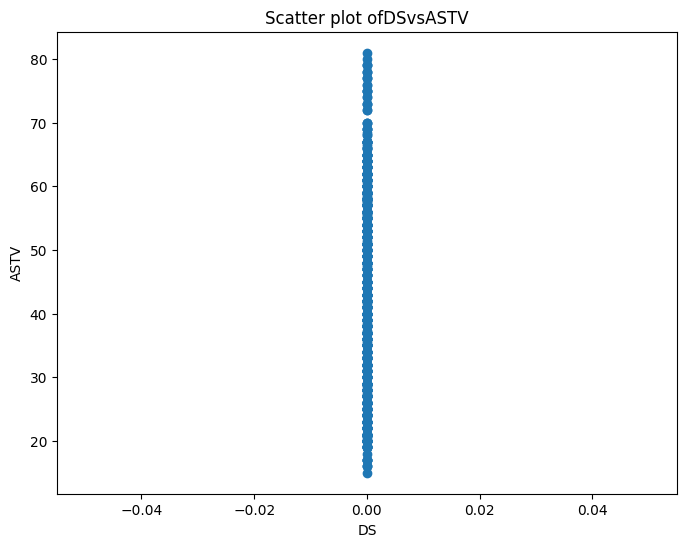

<Figure size 640x480 with 0 Axes>

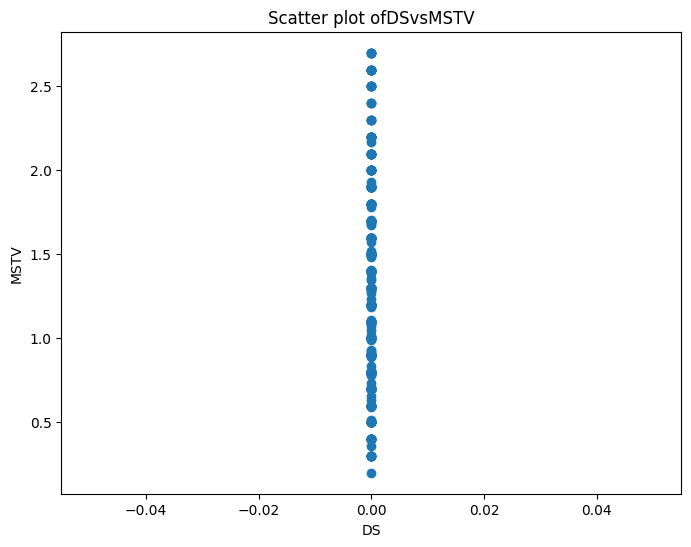

<Figure size 640x480 with 0 Axes>

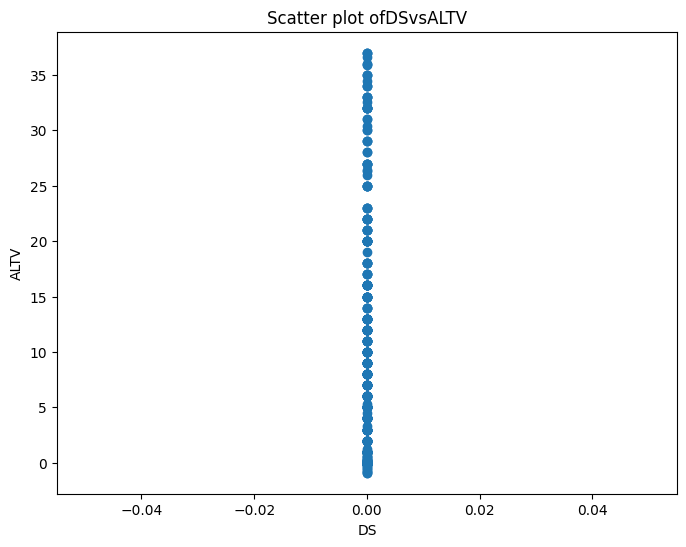

<Figure size 640x480 with 0 Axes>

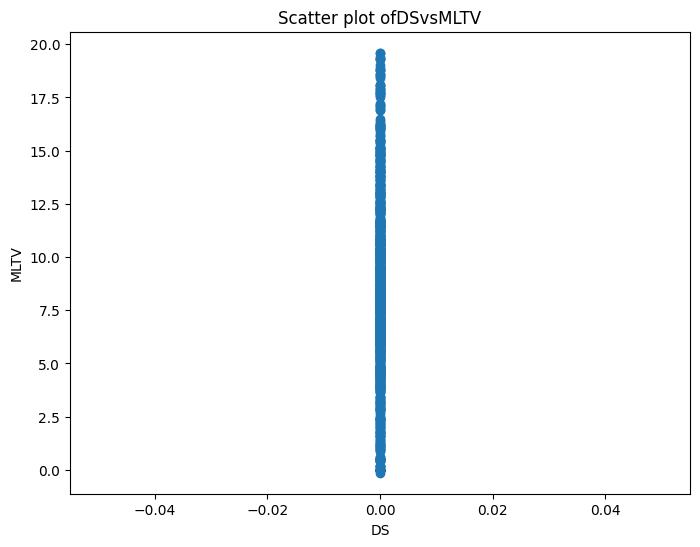

<Figure size 640x480 with 0 Axes>

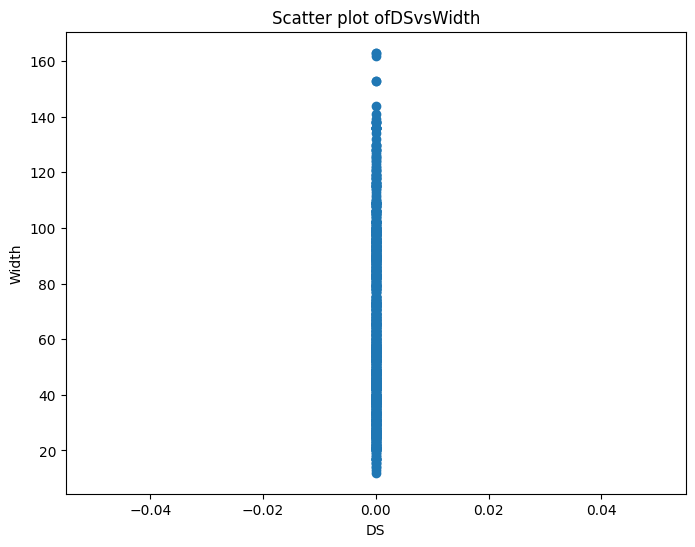

<Figure size 640x480 with 0 Axes>

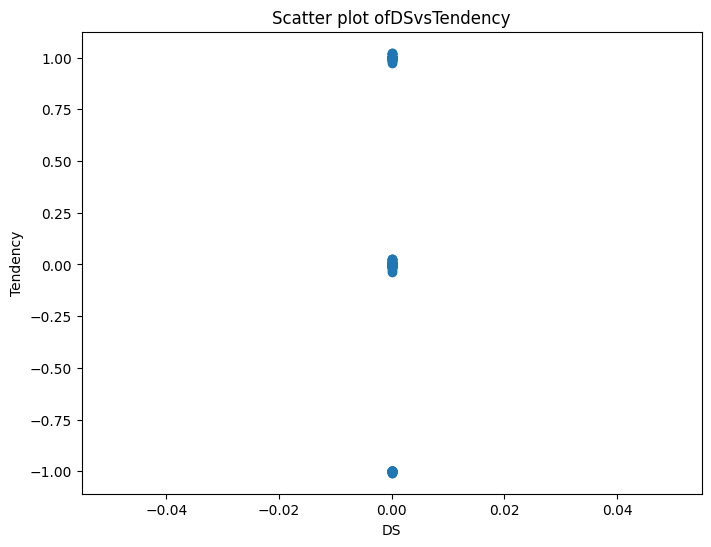

<Figure size 640x480 with 0 Axes>

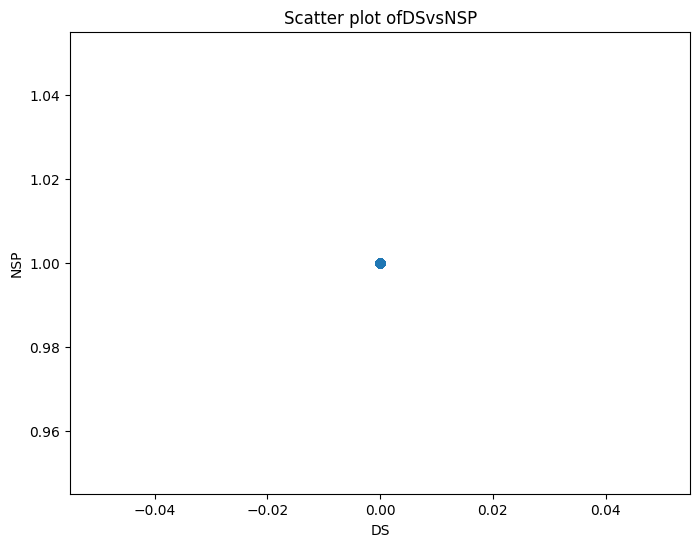

<Figure size 640x480 with 0 Axes>

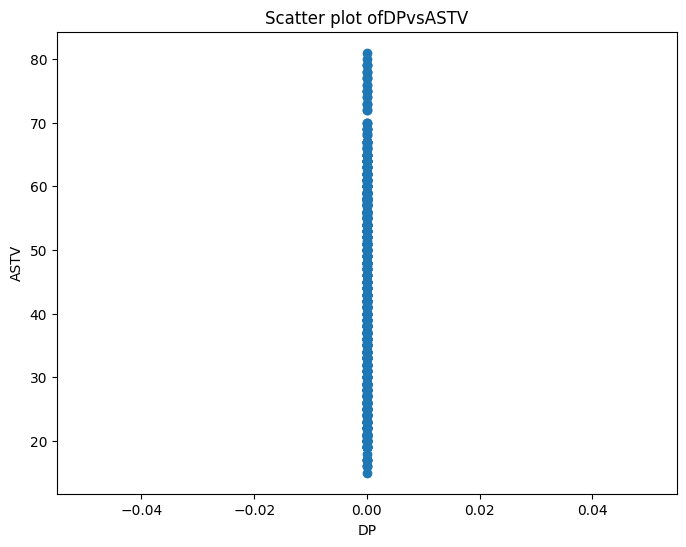

<Figure size 640x480 with 0 Axes>

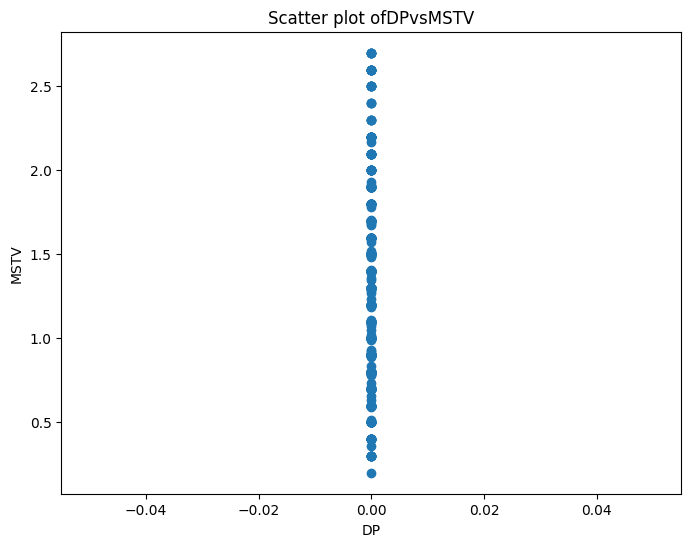

<Figure size 640x480 with 0 Axes>

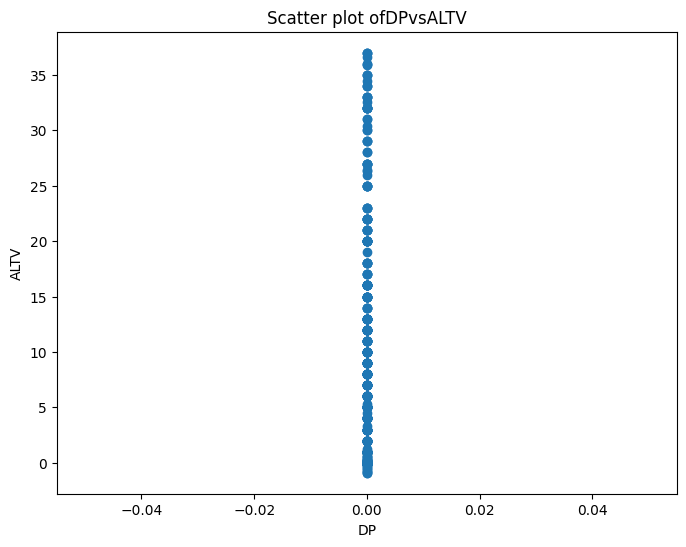

<Figure size 640x480 with 0 Axes>

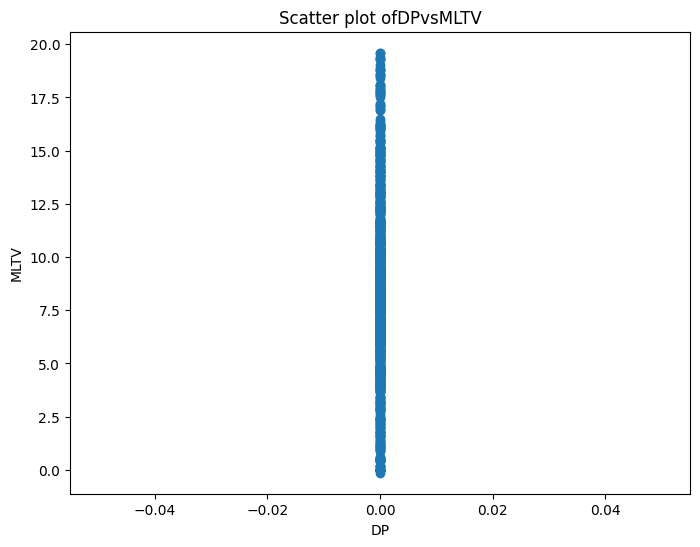

<Figure size 640x480 with 0 Axes>

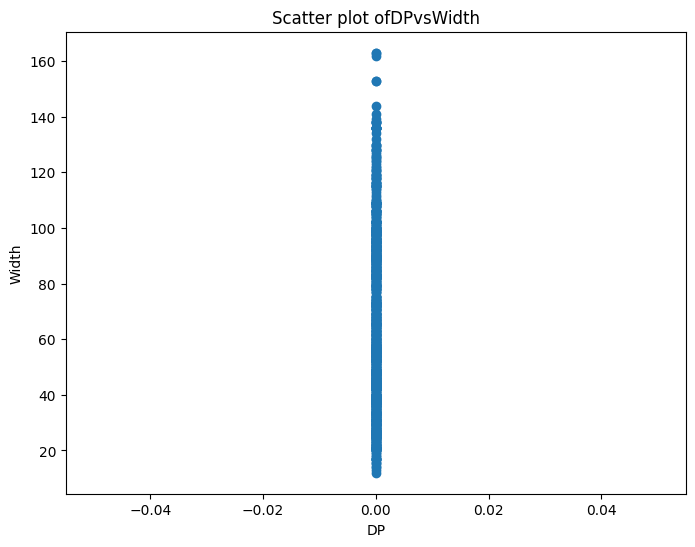

<Figure size 640x480 with 0 Axes>

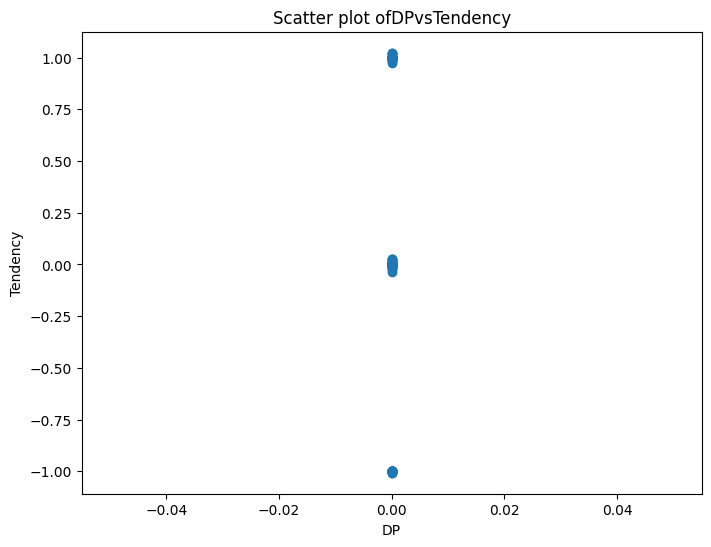

<Figure size 640x480 with 0 Axes>

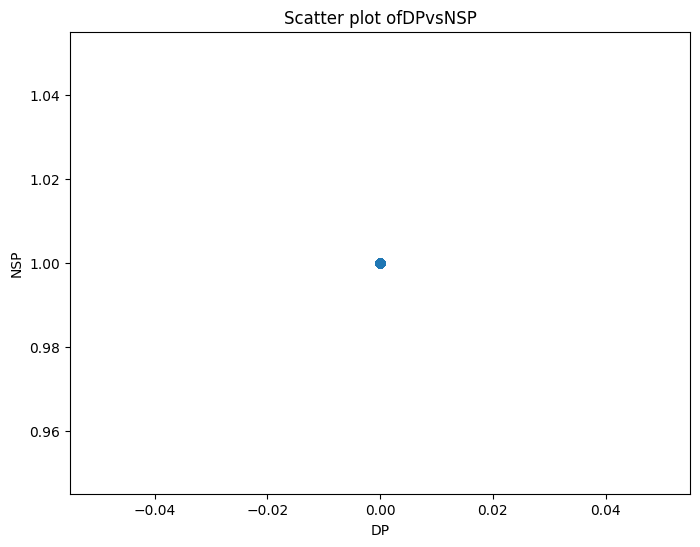

<Figure size 640x480 with 0 Axes>

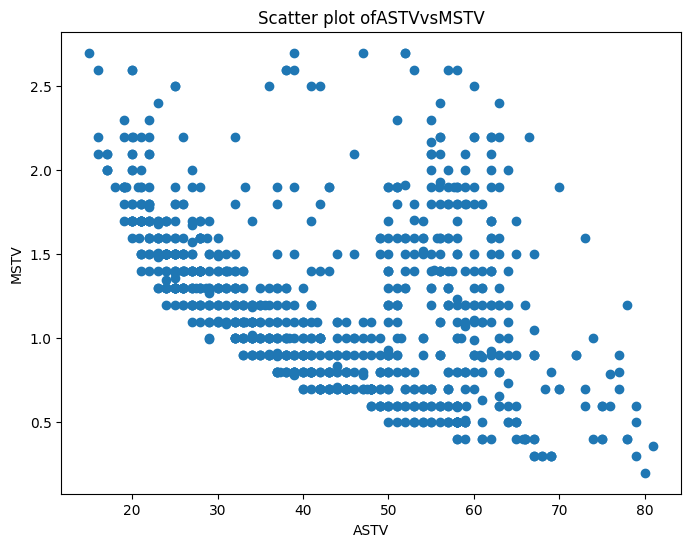

<Figure size 640x480 with 0 Axes>

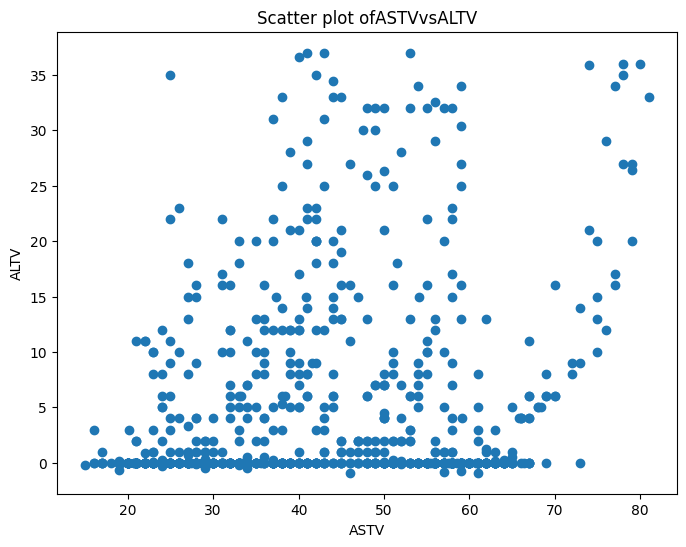

<Figure size 640x480 with 0 Axes>

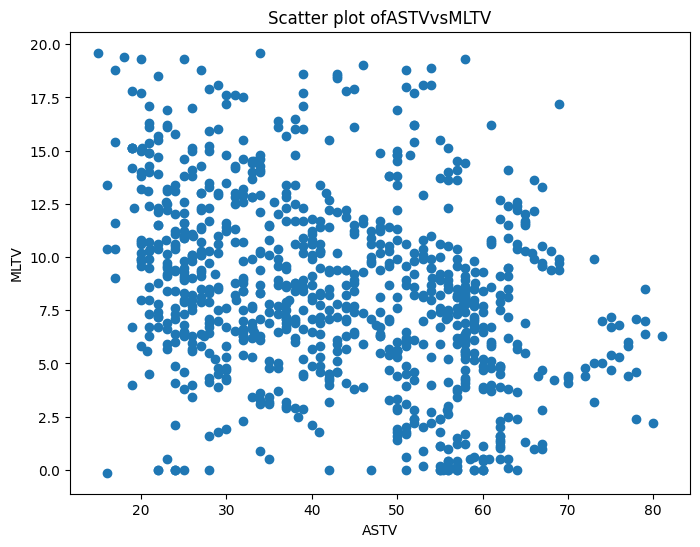

<Figure size 640x480 with 0 Axes>

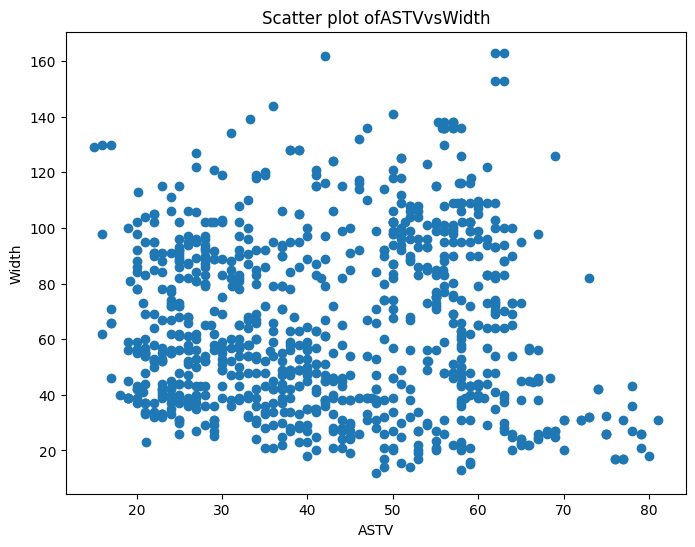

<Figure size 640x480 with 0 Axes>

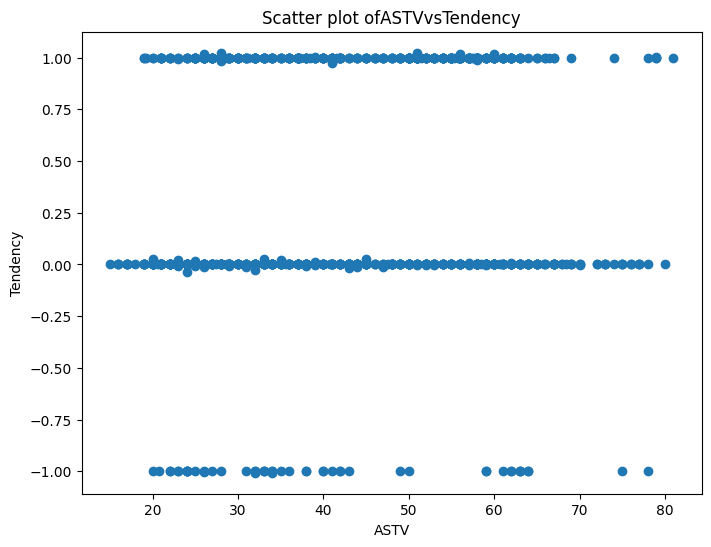

<Figure size 640x480 with 0 Axes>

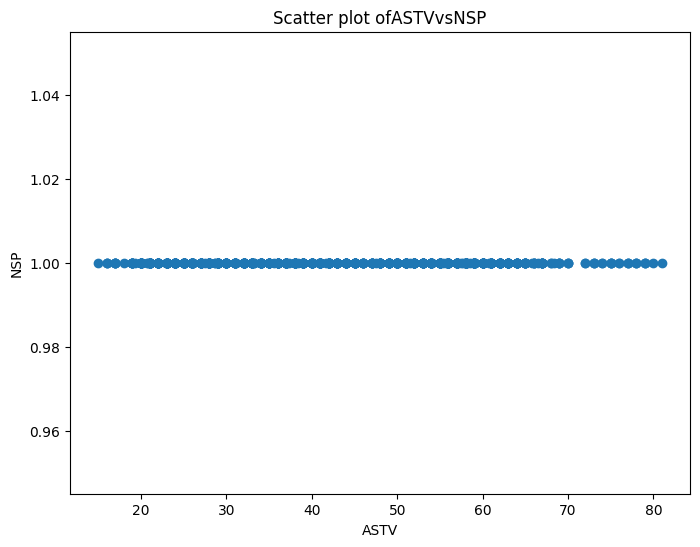

<Figure size 640x480 with 0 Axes>

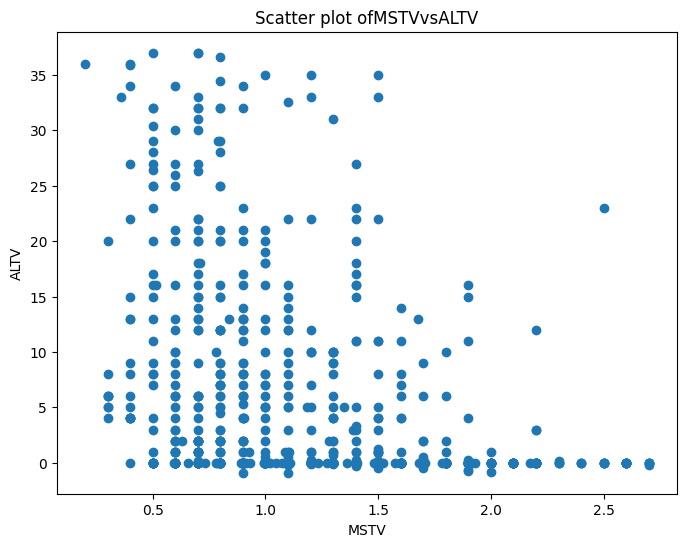

<Figure size 640x480 with 0 Axes>

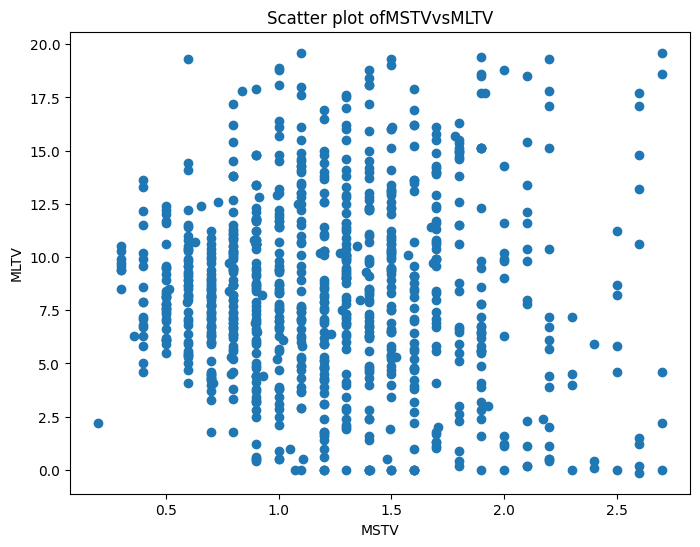

<Figure size 640x480 with 0 Axes>

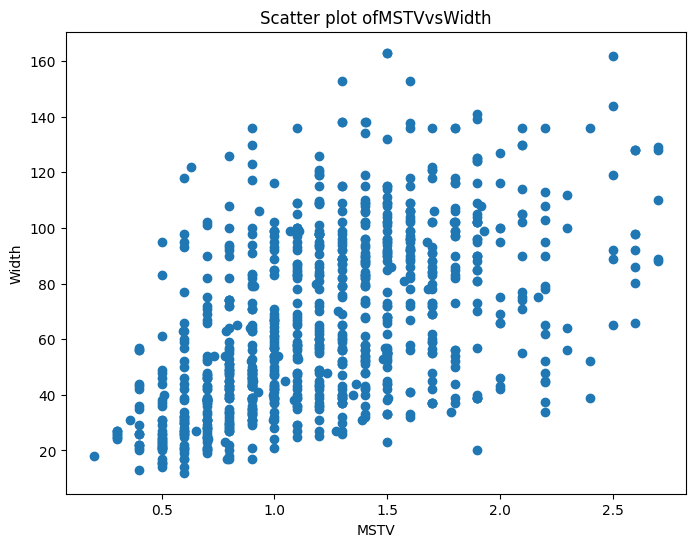

<Figure size 640x480 with 0 Axes>

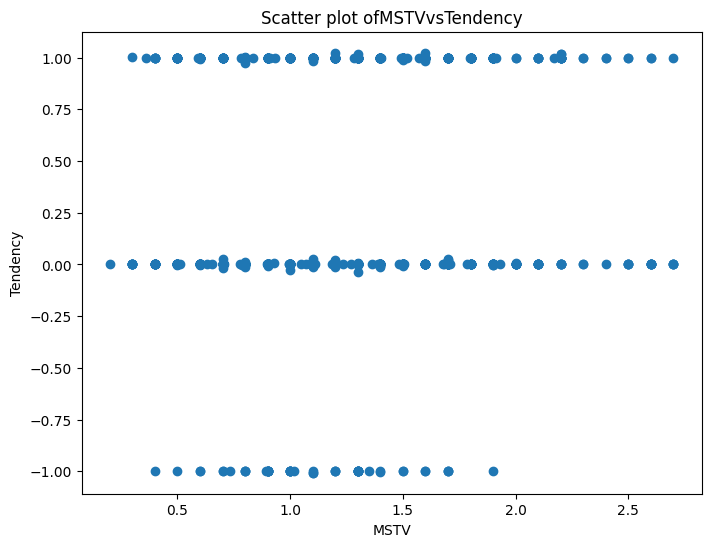

<Figure size 640x480 with 0 Axes>

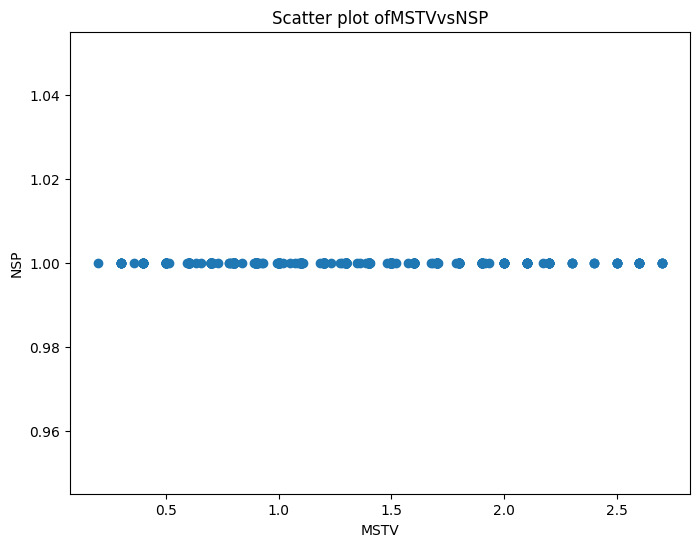

<Figure size 640x480 with 0 Axes>

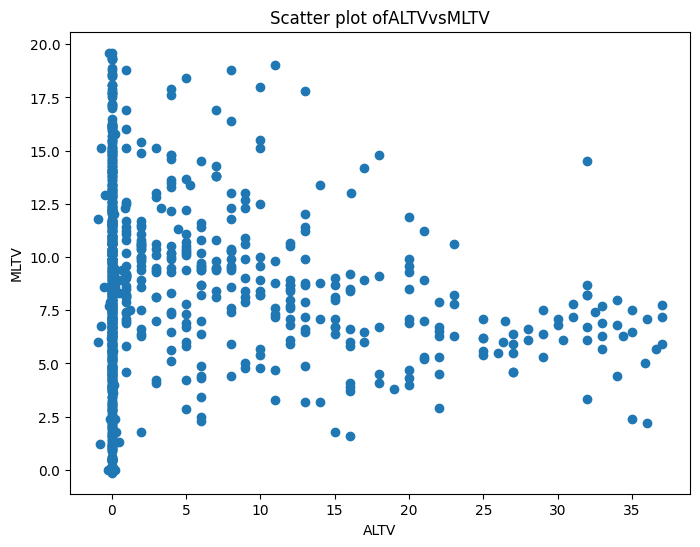

<Figure size 640x480 with 0 Axes>

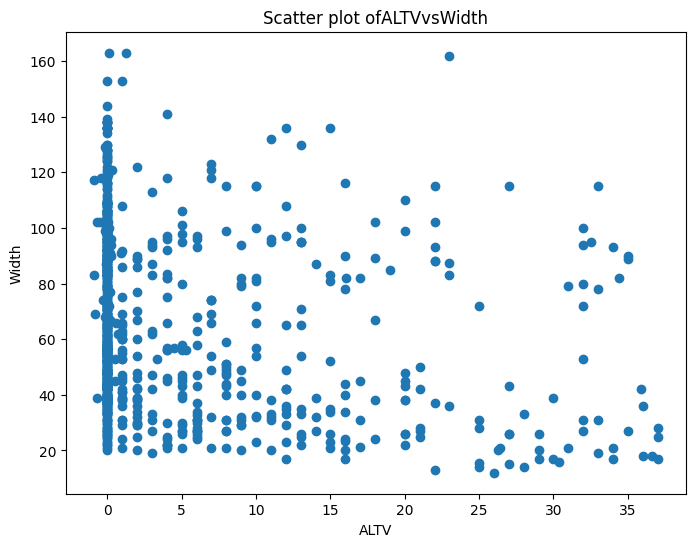

<Figure size 640x480 with 0 Axes>

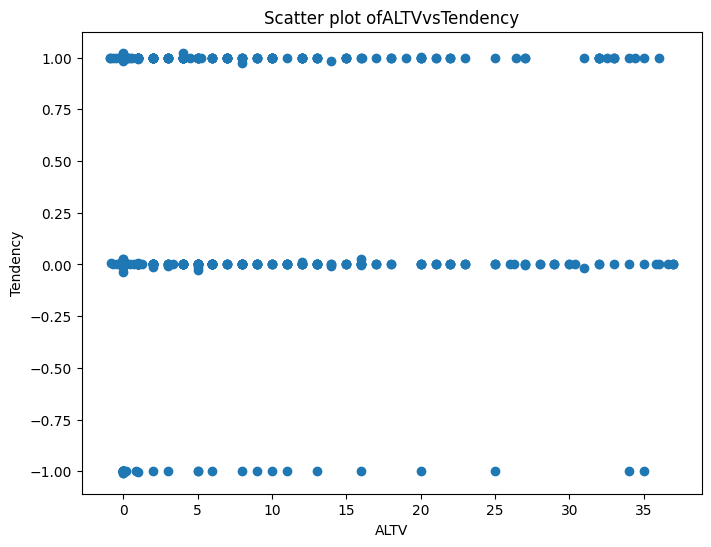

<Figure size 640x480 with 0 Axes>

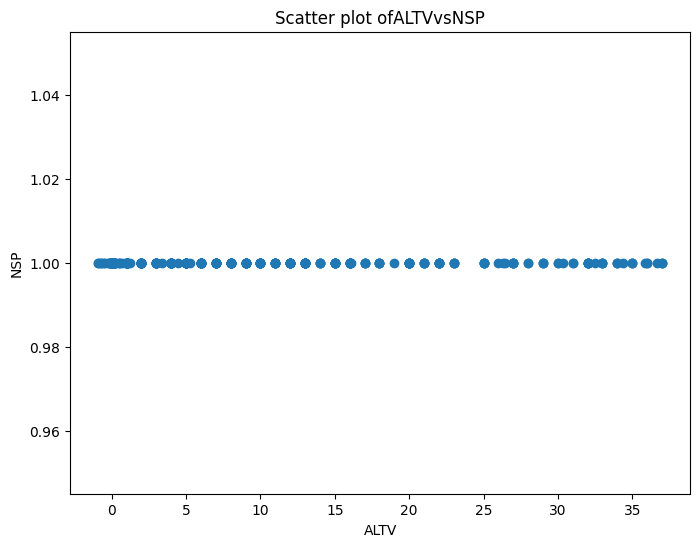

<Figure size 640x480 with 0 Axes>

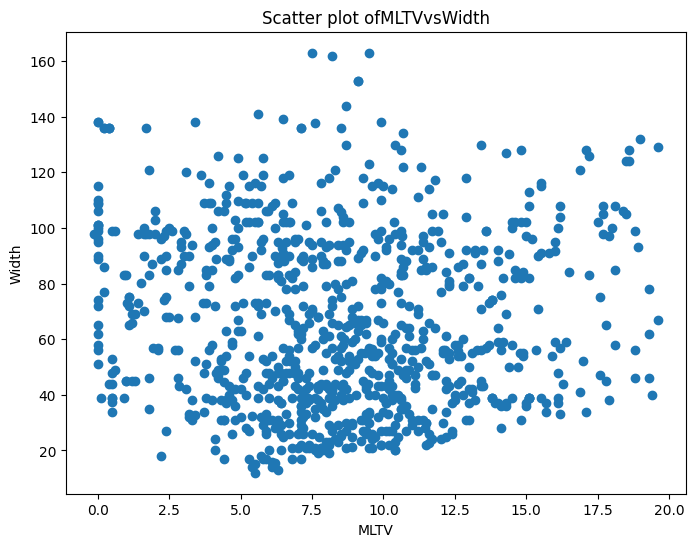

<Figure size 640x480 with 0 Axes>

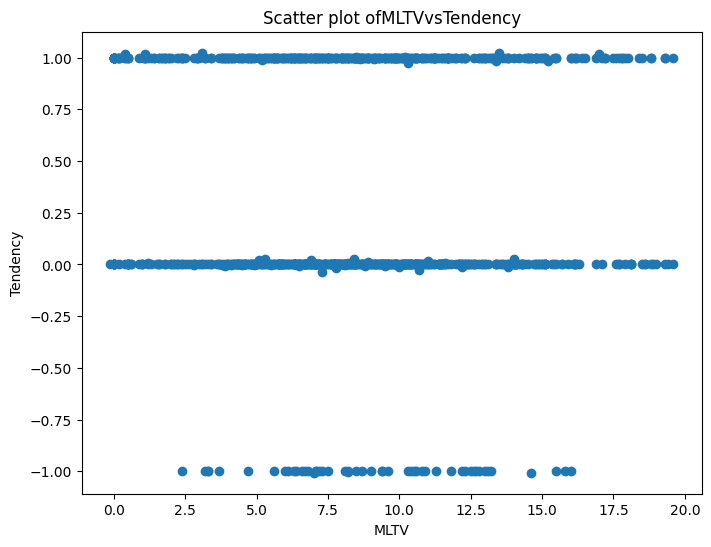

<Figure size 640x480 with 0 Axes>

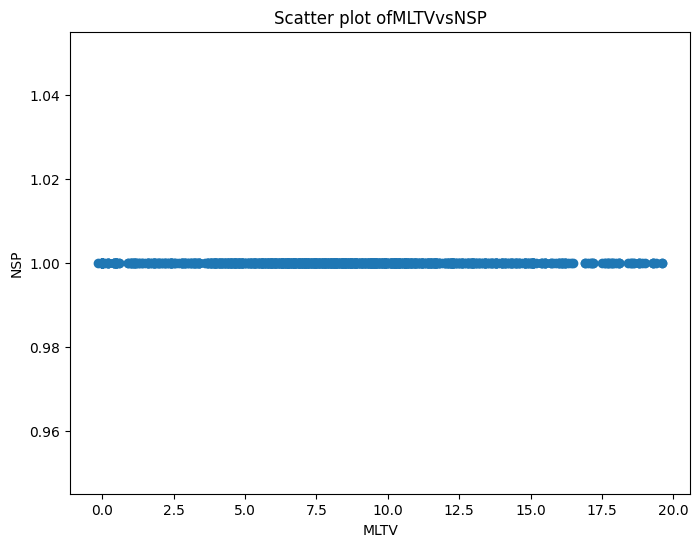

<Figure size 640x480 with 0 Axes>

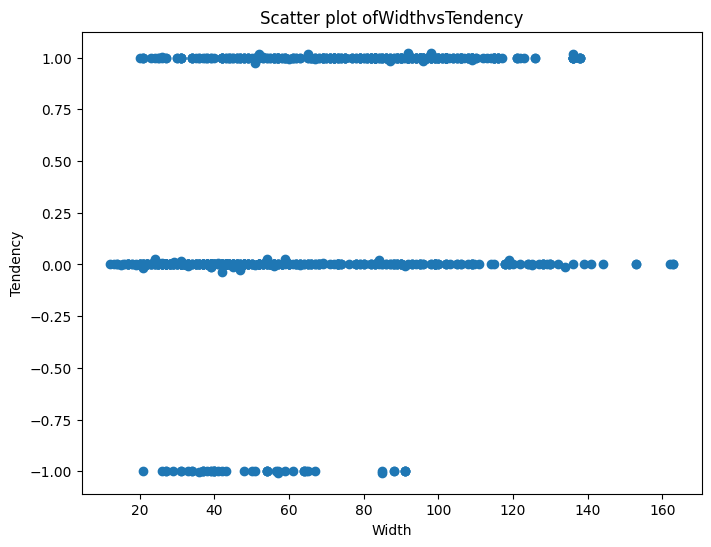

<Figure size 640x480 with 0 Axes>

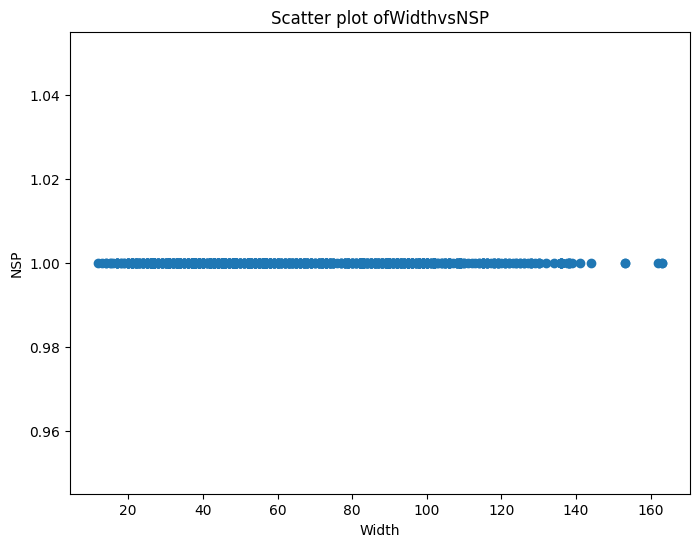

<Figure size 640x480 with 0 Axes>

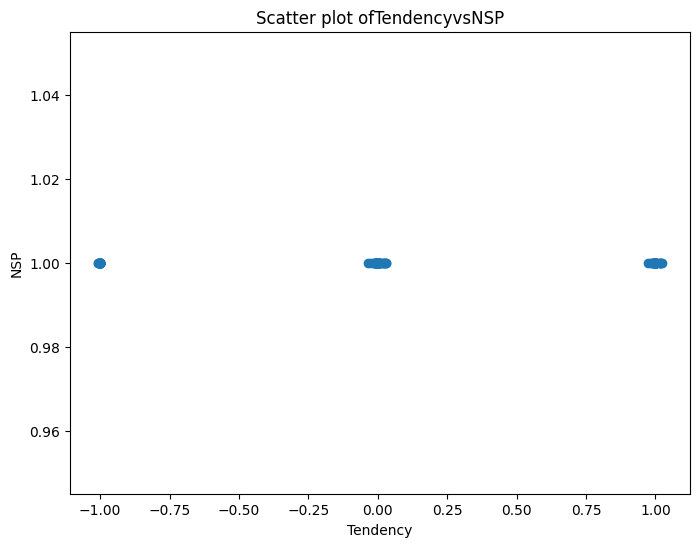

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range (len(df.select_dtypes(include=['number']).columns)):
  for j in range(i+1,len(df.select_dtypes(include=['number']).columns)):
    col1=df.select_dtypes(include=['number']).columns[i]
    col2=df.select_dtypes(include=['number']).columns[j]
    plt.figure(figsize=(8,6))
    plt.scatter(df[col1],df[col2])
    plt.title(f'Scatter plot of{col1}vs{col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.figure()

In [ ]:
correlation_threshold=0.7
correlation_matrix=df.corr()
for i in range(len(correlation_matrix.columns)):
  for j in range(i+1,len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i,j])>correlation_threshold:
      print(f"Strong correlation found between {correlation_matrix.columns[i]}and{correlation_matrix.iloc[i,j]:.2f}")

In [ ]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
plt.show()

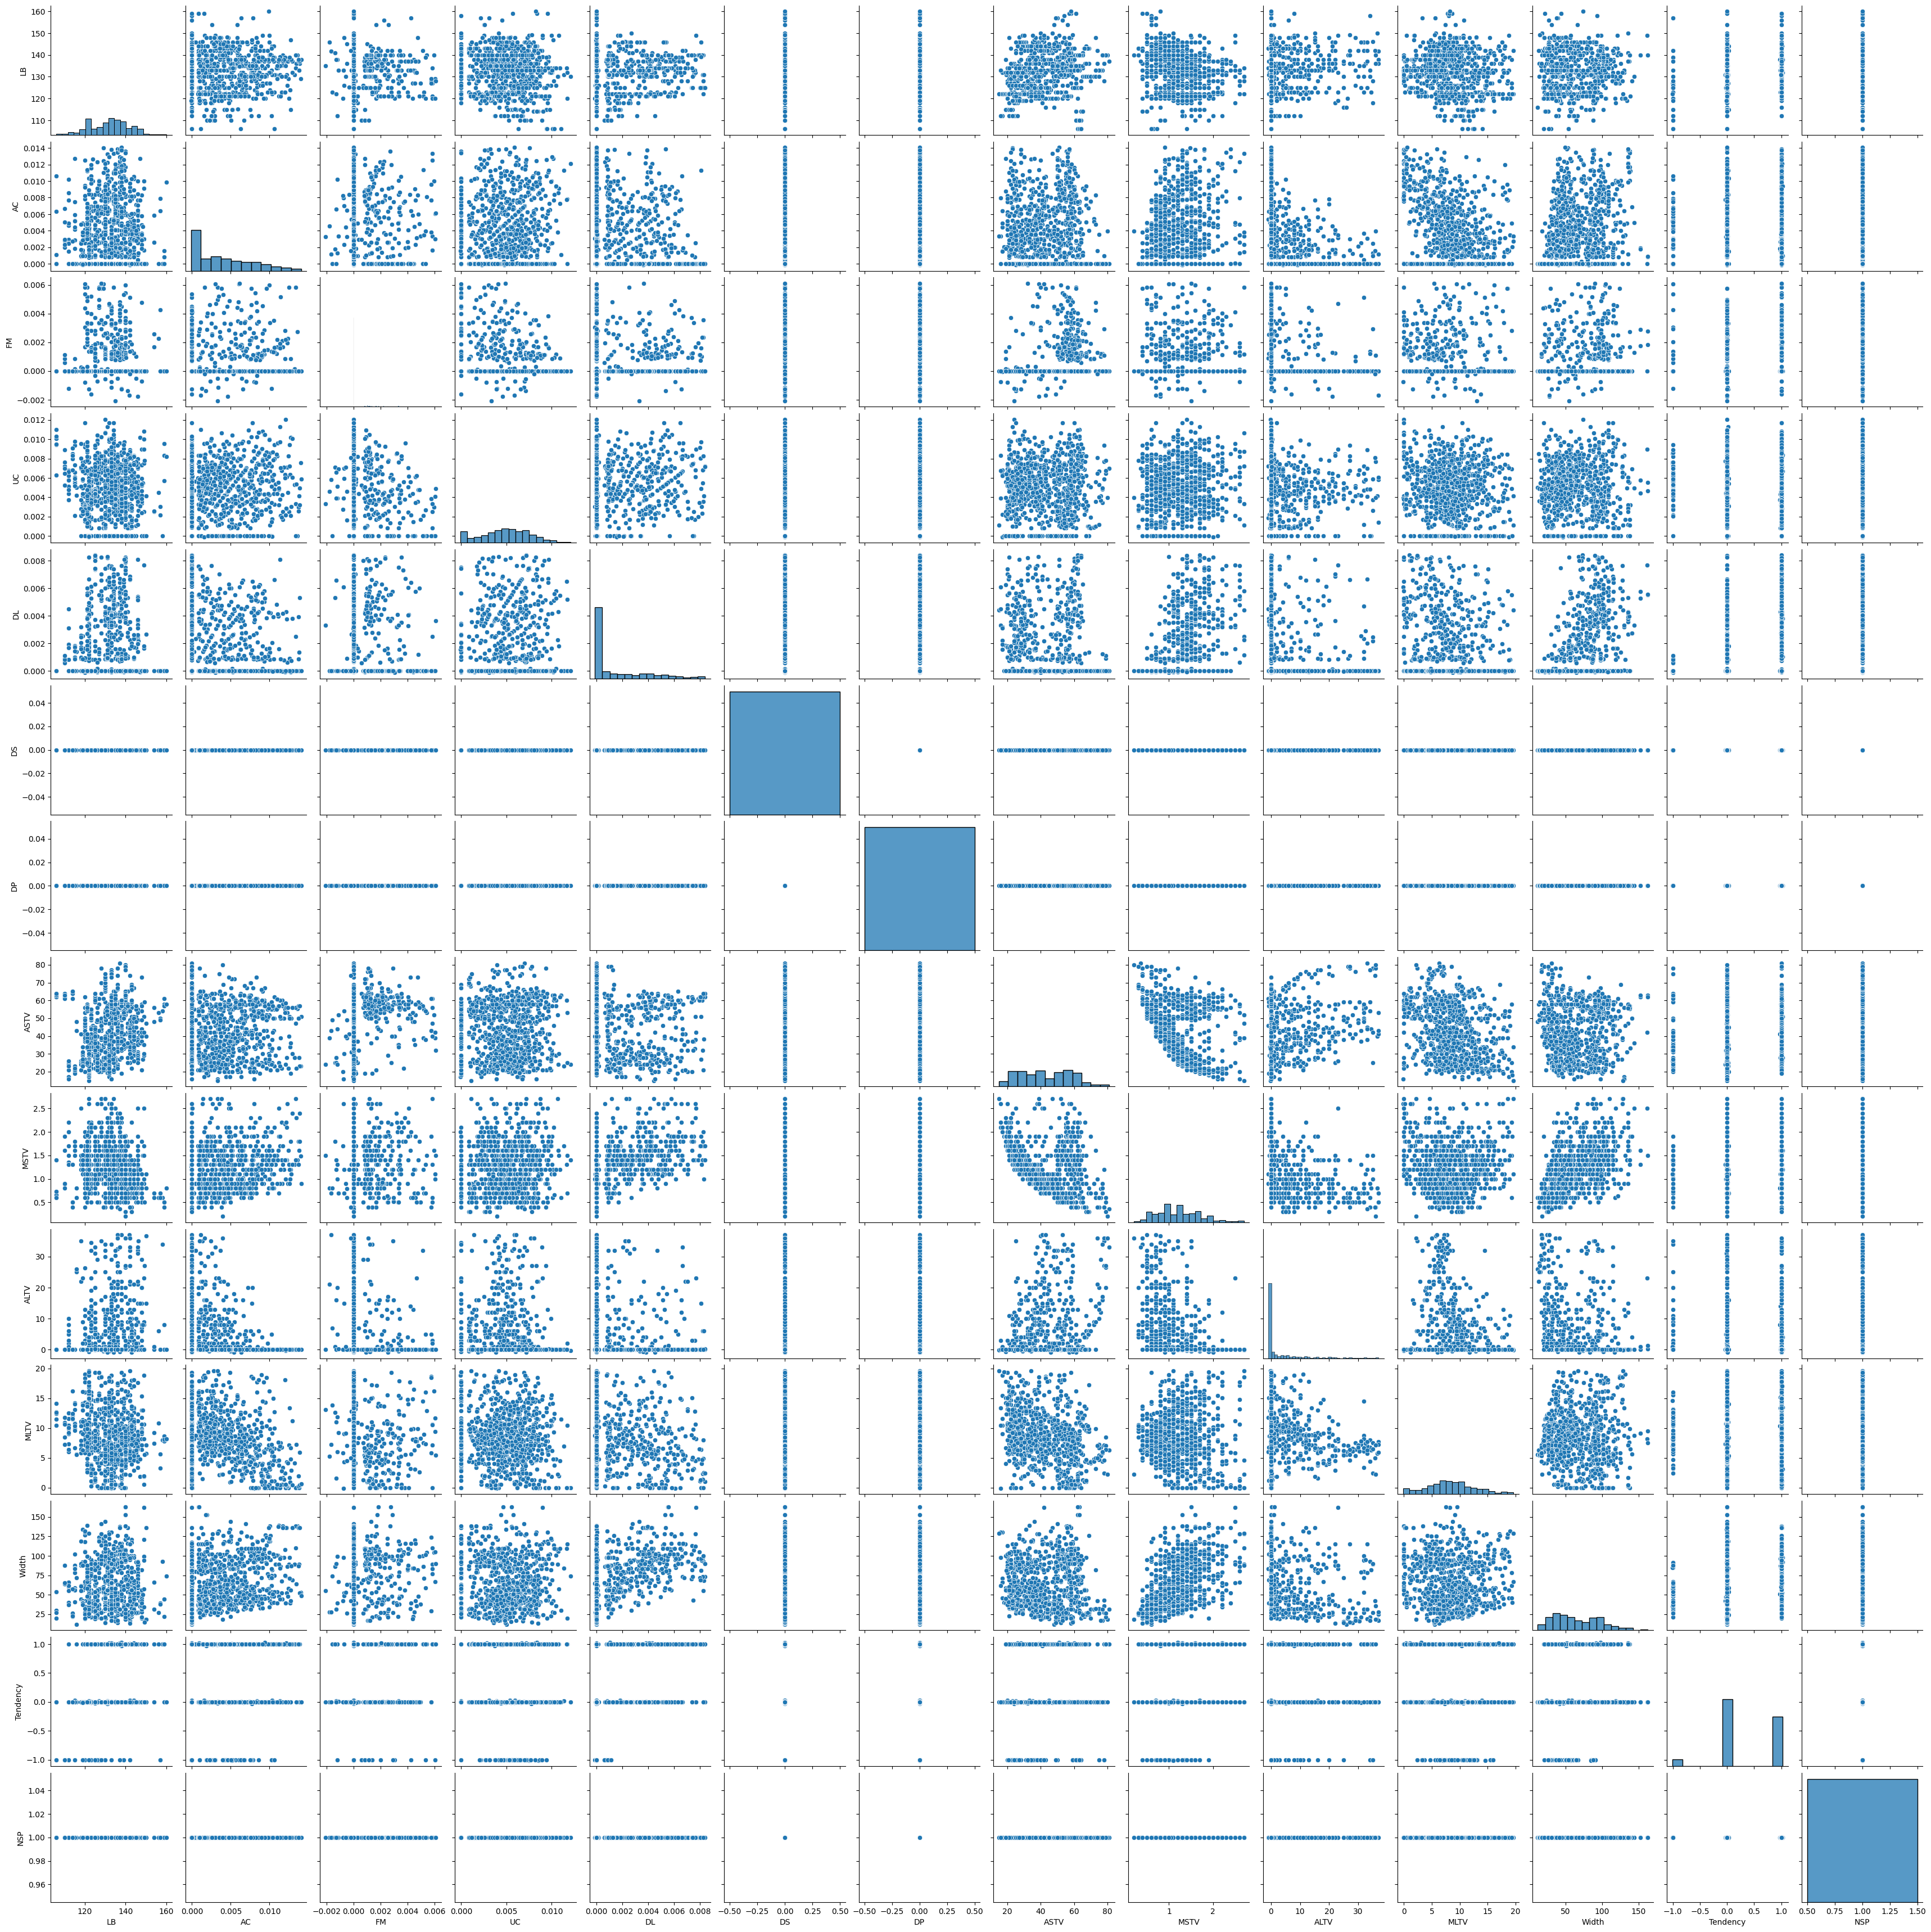

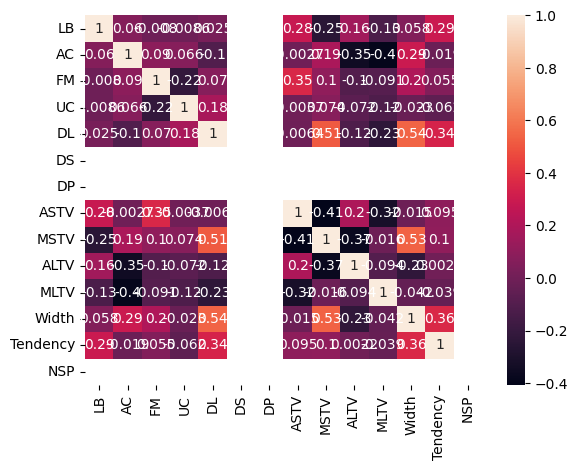

In [ ]:
sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(),annot=True)
plt.show()

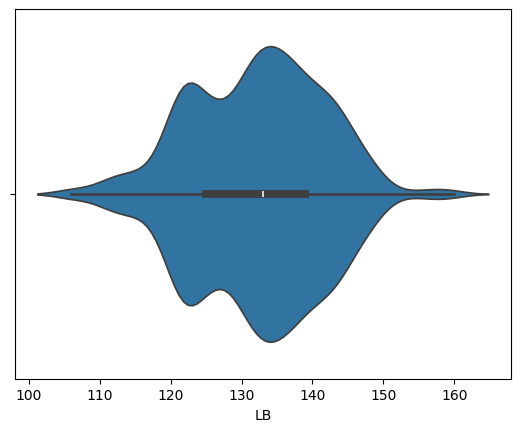

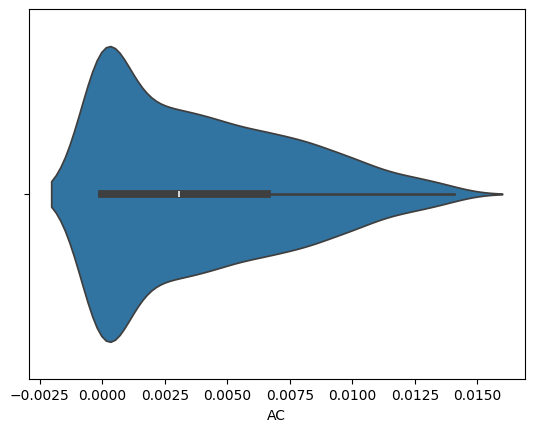

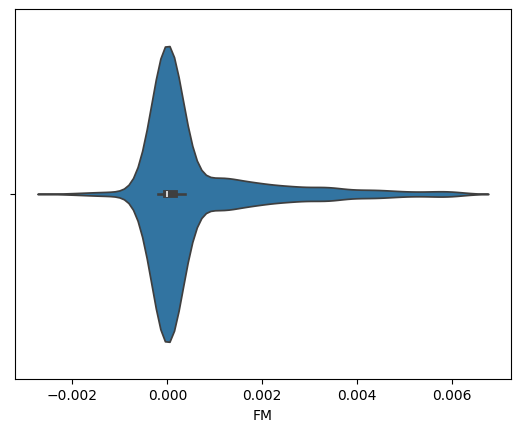

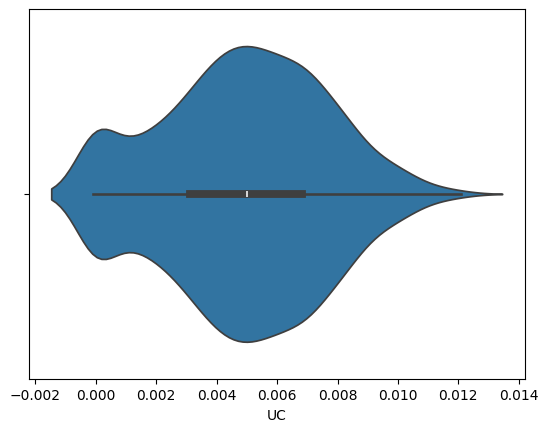

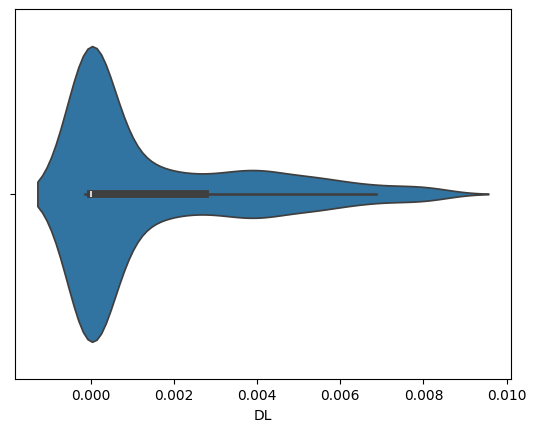

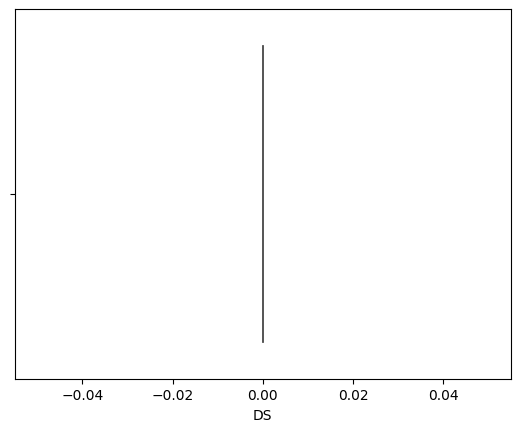

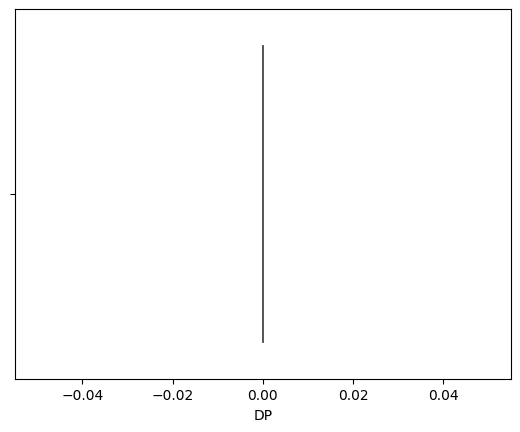

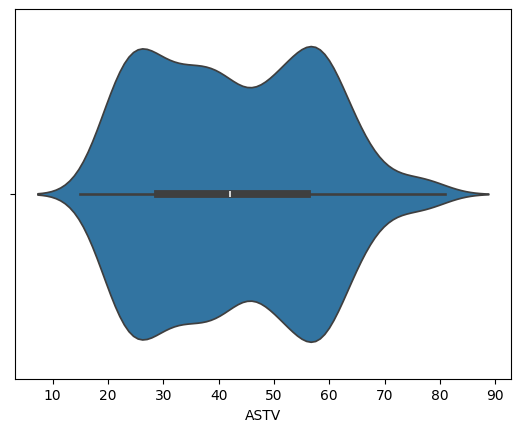

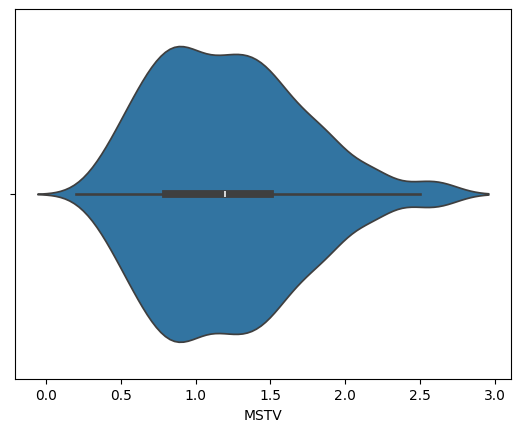

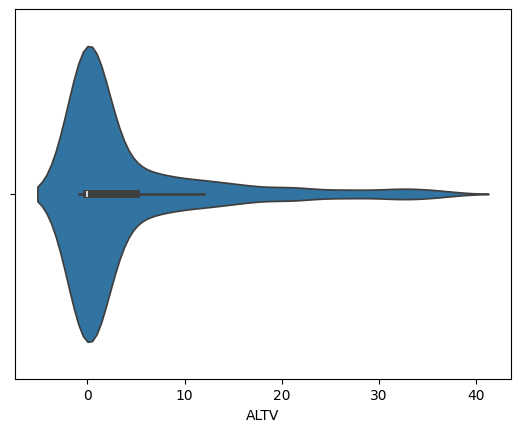

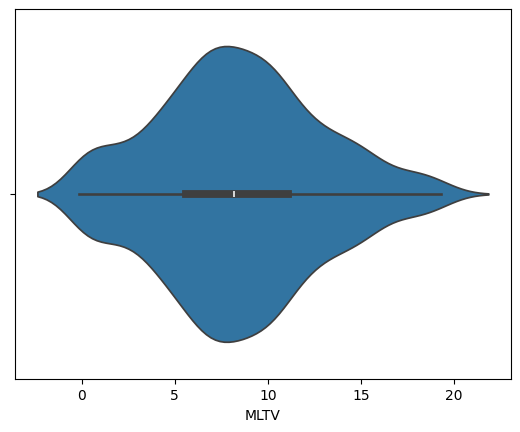

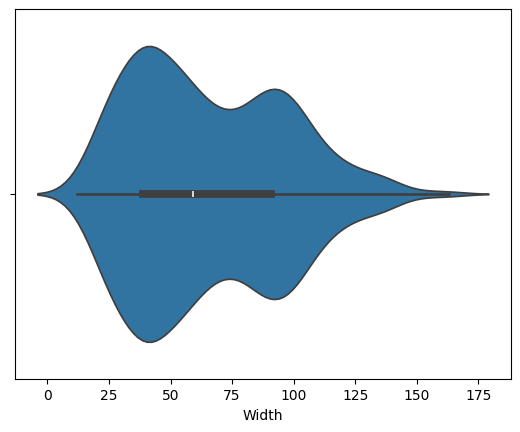

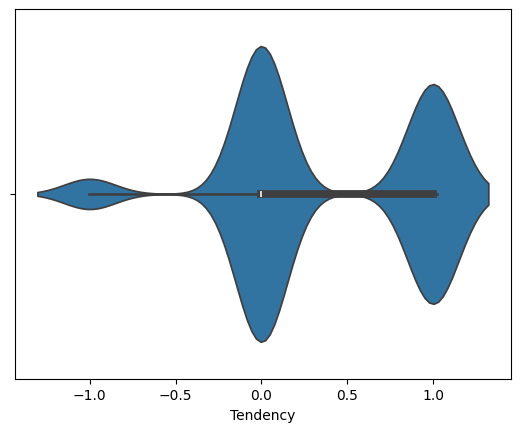

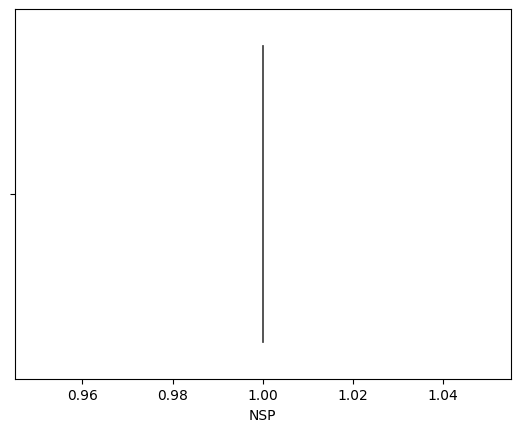

In [ ]:
for column in df.columns:
  if df[column].dtype in ['int64','float64']:
    sns.violinplot(x=column,data=df)
    plt.show()
    df[column]=pd.Categorical(df[column])
    df[column]=df[column].cat.codes

                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.045971 -0.010212  0.011698  0.011718 NaN NaN  0.310864   
AC        0.045971  1.000000  0.087379  0.052517 -0.090006 NaN NaN -0.006573   
FM       -0.010212  0.087379  1.000000 -0.214298  0.080888 NaN NaN  0.368814   
UC        0.011698  0.052517 -0.214298  1.000000  0.169872 NaN NaN  0.010349   
DL        0.011718 -0.090006  0.080888  0.169872  1.000000 NaN NaN -0.016005   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.310864 -0.006573  0.368814  0.010349 -0.016005 NaN NaN  1.000000   
MSTV     -0.291188  0.199005  0.094370  0.060232  0.528851 NaN NaN -0.455722   
ALTV      0.178371 -0.415910 -0.117322 -0.088369 -0.169559 NaN NaN  0.181665   
MLTV     -0.116959 -0.388863 -0.115293 -0.093105 -0.230884 NaN NaN -0.326491   
Width     0.048689  0.295230  0.202033 -

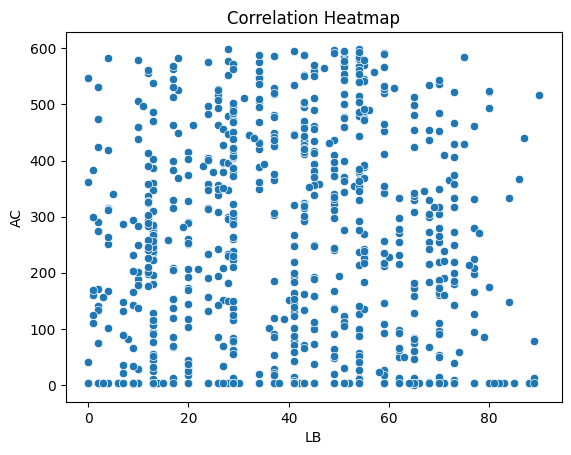

In [ ]:
correlation_matrix=df.corr()
print(correlation_matrix)
sns.scatterplot(data=df,x=df.select_dtypes(include='number').columns[0],y=df.select_dtypes(include='number').columns[1])
plt.title('Correlation Heatmap')
plt.show()

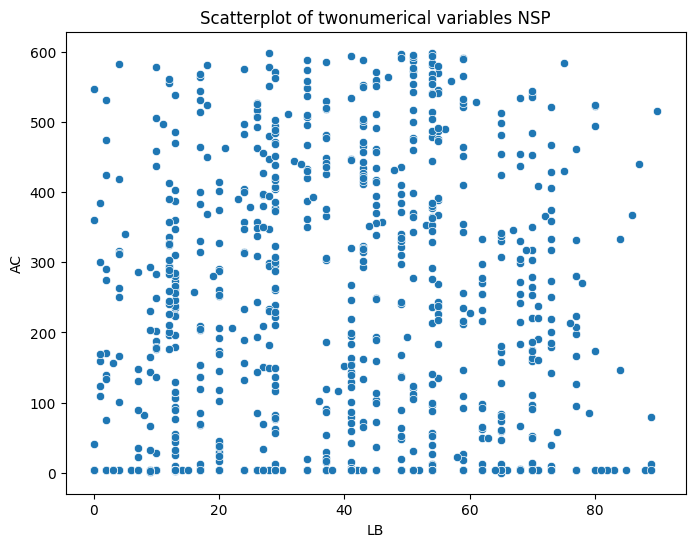

In [ ]:
if len(df.select_dtypes(include=np.number).columns)>=2:
  plt.figure(figsize=(8,6))
  sns.scatterplot(data=df,x=df.select_dtypes(include=np.number).columns[0],y=df.select_dtypes(include=np.number).columns[1])
  plt.title(f'Scatterplot of twonumerical variables {col}')
  plt.show()

In [ ]:
if 'Date' in df.columns:
  df['Date']=pd.to_datatime(df['Date'])
  for col in df.select_dtypes(include='number').columns:
    plt.figure()
    plt.plot(df['Date'],df[col])
    plt.title(f'Trend of {col}over time')
    plt.show()

In [ ]:
print("\nImpact on descision making and further Analysis:")
print("-strong correlation sugest potential multicolinearity issues,which should be addressed in further analysis.")
print("-The didtribution of variables can imform future engineering and ,odel selection .")
print("-Outliers and anamolies may require further investigation and handling.")


Impact on descision making and further Analysis:
-strong correlation sugest potential multicolinearity issues,which should be addressed in further analysis.
-The didtribution of variables can imform future engineering and ,odel selection .
-Outliers and anamolies may require further investigation and handling.
